<a href="https://colab.research.google.com/github/Garima16237/data_bank/blob/main/NewFortnight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics


In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/Garima16237/data_bank/main/bank.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**DATA VISUALISATION**

In [ ]:
sns.set(color_codes=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


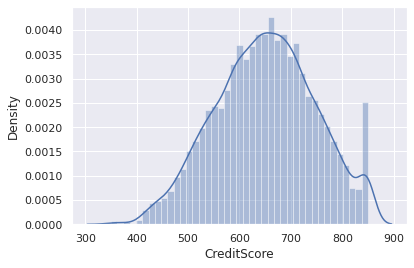

In [ ]:
sns.distplot(data["CreditScore"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


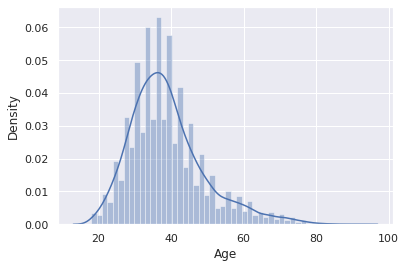

In [ ]:
sns.distplot(data["Age"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


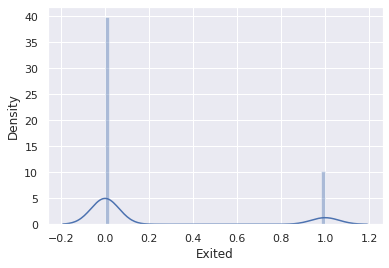

In [ ]:
sns.distplot(data["Exited"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


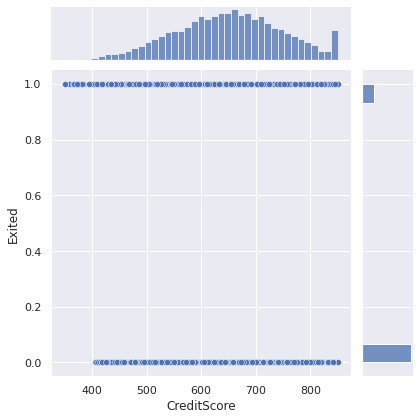

In [ ]:
sns.jointplot(data["CreditScore"],data["Exited"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


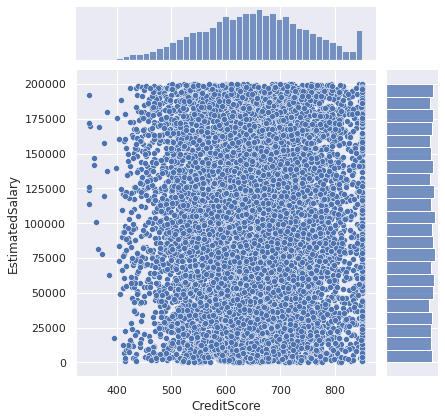

In [ ]:
sns.jointplot(data["CreditScore"],data["EstimatedSalary"])

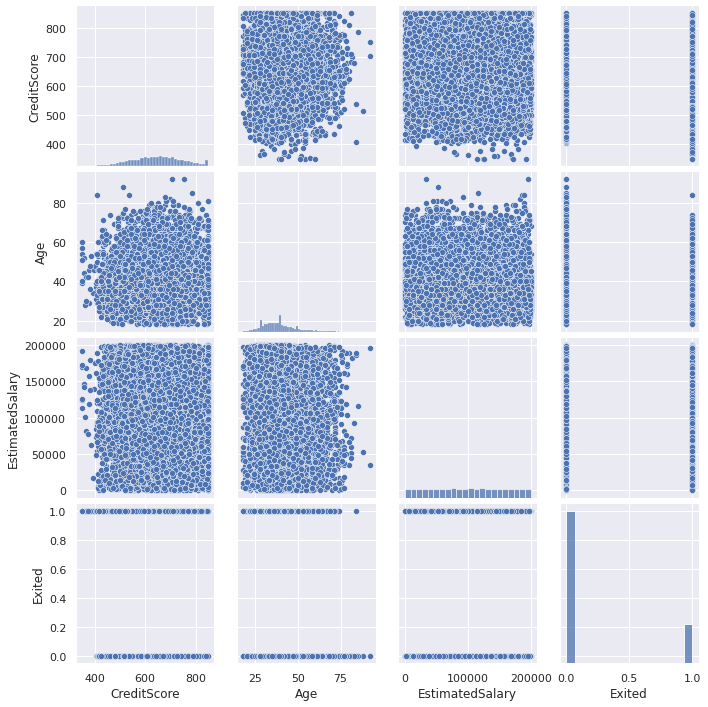

In [ ]:
sns.pairplot(data[['CreditScore','Age','EstimatedSalary','Exited']])

**Bar Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


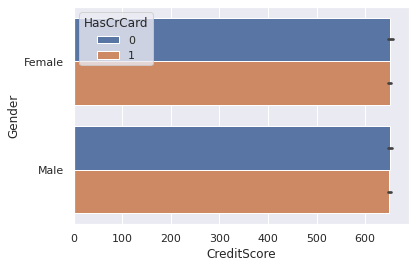

In [ ]:
sns.barplot(data['CreditScore'], data['Gender'], hue=data['HasCrCard'])

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


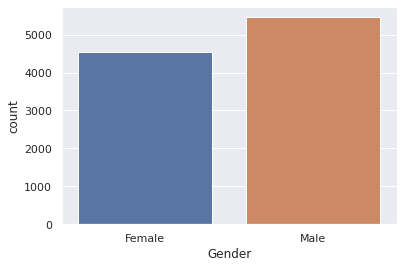

In [ ]:
sns.countplot(data['Gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


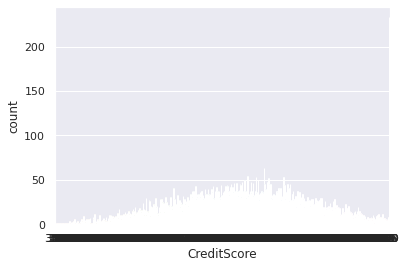

In [ ]:
sns.countplot(data['CreditScore'])

**Point Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


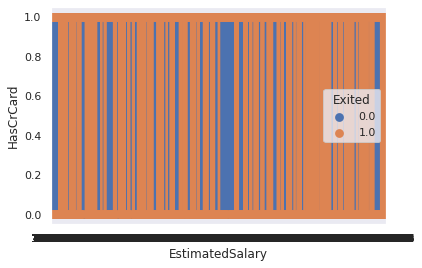

In [ ]:
sns.pointplot(data['EstimatedSalary'], data['HasCrCard'], hue=data['Exited'])

Outlier

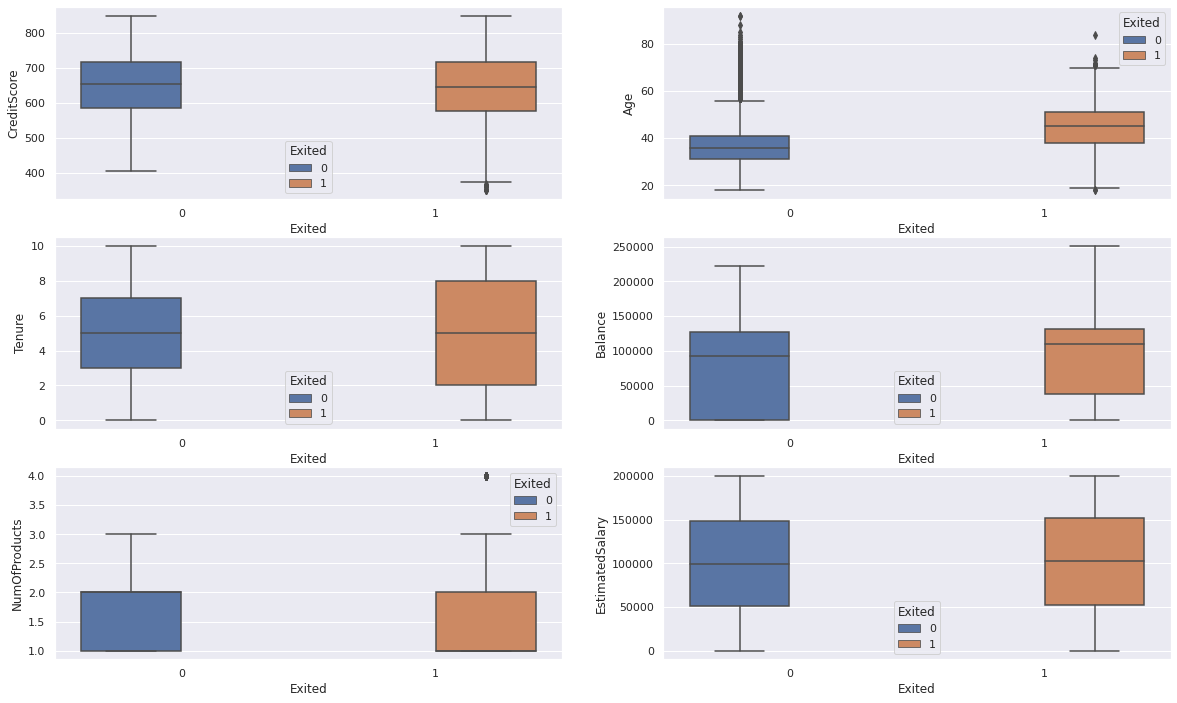

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

Correlation Matrix

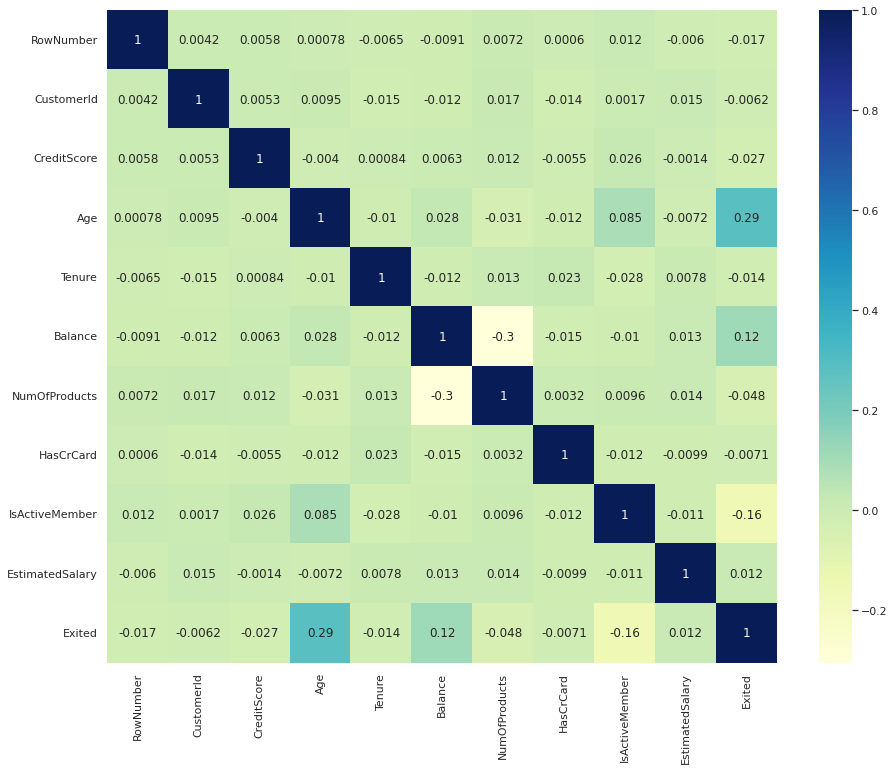

In [ ]:
plt.figure( figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

Removing the unnecassary features from the datase

In [ ]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'], axis = 1)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
data.describe(include='O').T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Find categorical**

In [ ]:
categorical_cols = ['Geography','Gender']

len(categorical_cols)

2

To get value count of call the categorical variables in one go:

In [ ]:
for col in categorical_cols:

    print(col)

    print(data[col].value_counts())

    print("\n\n")

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64



Gender
Male      5457
Female    4543
Name: Gender, dtype: int64





In [ ]:
numerical_cols=[]
for col in data.columns:
    if col not in categorical_cols:
        numerical_cols.append(col)
        
numerical_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

One-Hot encoding the categorical parameters using get_dummies()

In [ ]:
one_hot_encoded_data = pd.get_dummies(data,columns=['Geography','Gender'])
print(one_hot_encoded_data)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1                 1   
1            

In [ ]:
data= pd.concat([data, one_hot_encoded_data], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
data=data.drop(['Geography','Gender'],axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore,...,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,619,...,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,608,...,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,502,...,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,699,...,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,850,...,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
data['Exited'].head()

,Exited,Exited
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


Drop duplicate columns


In [ ]:
data = data.T.drop_duplicates().T
print(data)

      CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0     2.0       0.00            1.0        1.0   
1           608.0  41.0     1.0   83807.86            1.0        0.0   
2           502.0  42.0     8.0  159660.80            3.0        1.0   
3           699.0  39.0     1.0       0.00            2.0        0.0   
4           850.0  43.0     2.0  125510.82            1.0        1.0   
...           ...   ...     ...        ...            ...        ...   
9995        771.0  39.0     5.0       0.00            2.0        1.0   
9996        516.0  35.0    10.0   57369.61            1.0        1.0   
9997        709.0  36.0     7.0       0.00            1.0        0.0   
9998        772.0  42.0     3.0   75075.31            2.0        1.0   
9999        792.0  28.0     4.0  130142.79            1.0        1.0   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                1.0        101348.88     1.0               1.0   
1

In [ ]:
data['Exited'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

In [ ]:
X= data.drop('Exited', axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,1.0,0.0


In [ ]:
ind_var=X

Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
X= pd.DataFrame(X,columns=ind_var.columns)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988


In [ ]:
Y= data['Exited']
Y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

Splitting data into train and test:

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

Lets apply the variance threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

Finding non constant features:

In [ ]:
sum(var_thres.get_support())

13

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [ ]:
for column in constant_columns:
  print(column)

In [ ]:
X_train = X_train.drop(constant_columns, axis=1)
X_train.shape

(8000, 13)

In [ ]:
X_test = X_test.drop(constant_columns, axis=1)
X_test.shape

(2000, 13)

To identify highly correlated variables and removing them:

In [ ]:
#Setting threshold of 50%
threshold=0.50

#find and remove correlated features

def correlation(X_train, threshold):
    col_corr = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                  colname= corr_matrix.columns[i]
                  col_corr.add(colname)
                
    return col_corr

In [ ]:
corr_features= correlation(X_train,0.50)
len(set(corr_features))

3

In [ ]:
# X_train= X_train.drop(corr_features,axis=1)
# X_test= X_test.drop(corr_features,axis=1)

In [ ]:
# X_train.shape, X_test.shape

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,0.367013,-0.660018,0.341352,-1.225848,0.807737,0.646092,0.970243,1.373784,0.997204,-0.578736,-0.573809,-0.912419,0.912419
1561,-0.191713,0.293517,-0.350204,0.691389,0.807737,0.646092,0.970243,1.667407,-1.002804,1.727904,-0.573809,-0.912419,0.912419
1670,-0.947028,-1.422847,-0.695982,0.613102,-0.911583,0.646092,-1.030670,-0.246910,-1.002804,-0.578736,1.742740,-0.912419,0.912419
6087,-0.926334,-1.136786,1.378686,0.948021,-0.911583,0.646092,-1.030670,0.921446,0.997204,-0.578736,-0.573809,1.095988,-1.095988
6669,-1.381593,1.628468,1.378686,1.052363,-0.911583,-1.547768,-1.030670,-1.053812,0.997204,-0.578736,-0.573809,-0.912419,0.912419


**Model Train**

**1.Decision Tree**

Model Without Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
print('Train Accuracy :', metrics.accuracy_score(Y_train, dt_model.predict(X_train)))
print('Train Area Under Score:', metrics.roc_auc_score(Y_train, dt_model.predict(X_train)))
print('Test Accuracy :', metrics.accuracy_score(Y_test, dt_model.predict(X_test)))
print('Test Area Under Score :', metrics.roc_auc_score(Y_test, dt_model.predict(X_test)))

Train Accuracy : 1.0
Train Area Under Score: 1.0
Test Accuracy : 0.787
Test Area Under Score : 0.6829187191533226


Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=dt_model,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

In [ ]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 16, 'splitter': 'random'}


**Pre-Pruning**

In [ ]:
from sklearn import tree

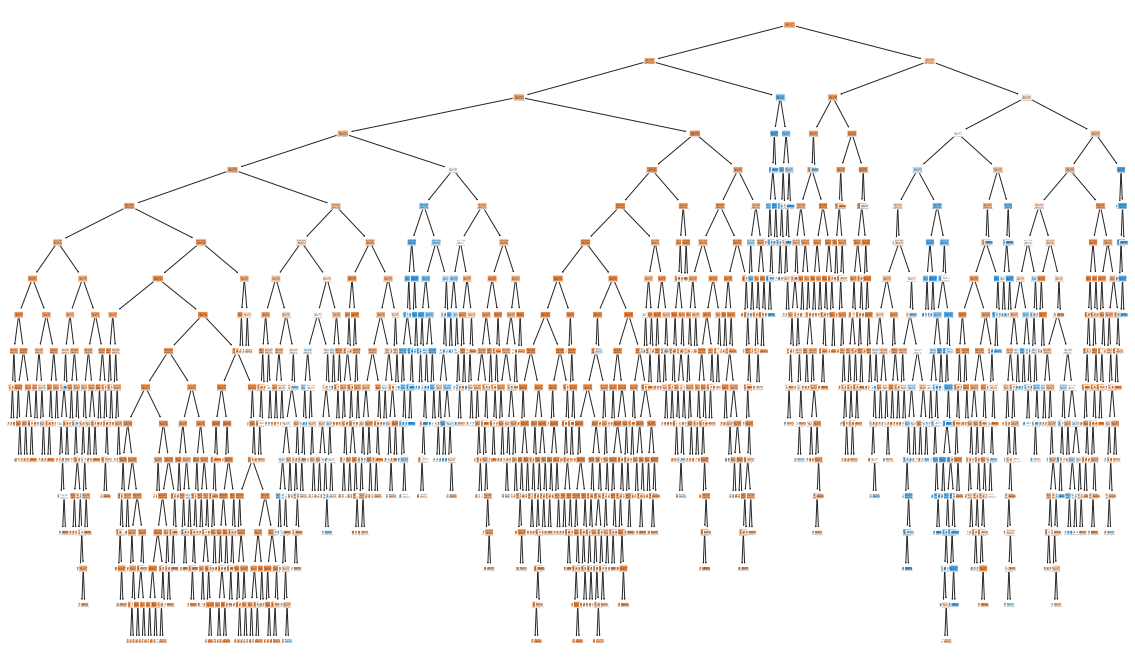

In [ ]:
dt_model=DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
dt_model.fit(X_train,Y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(dt_model,rounded=True,filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report ,roc_auc_score

In [ ]:
y_predicted=dt_model.predict(X_test)
accuracy_score(Y_test,y_predicted)

0.843

Visulization Decision Tree

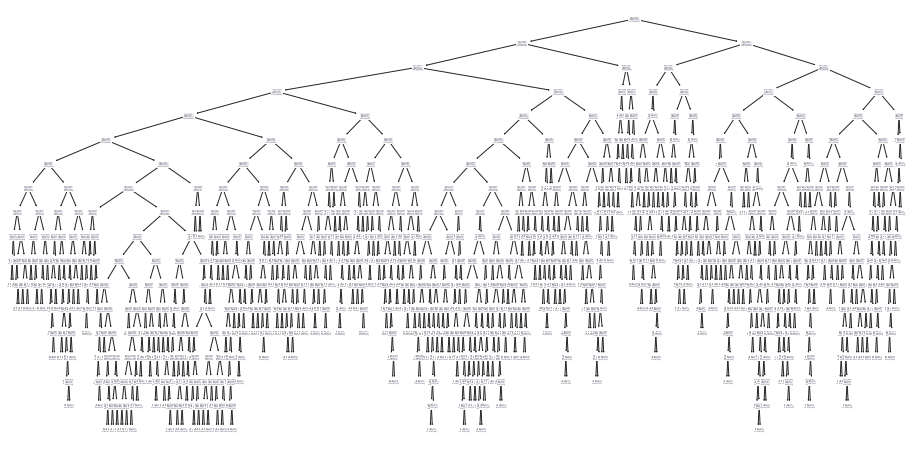

In [ ]:
plt.figure(figsize=(16,8))
tree.plot_tree(dt_model)
plt.show()

Post-pruning

In [ ]:
path=dt_model.cost_complexity_pruning_path(X_train,Y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

In [ ]:
dtc_model=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    dt_model=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    dt_model.fit(X_train,Y_train)
    dtc_model.append(dt_model)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(dtc_model[-1].tree_.node_count,ccp_alphas[-1]))

Visualizing the accuracy score for train and test set

In [ ]:
train_scores = [dt_model.score(X_train, Y_train) for dt_model in dtc_model]
test_scores = [dt_model.score(X_test, Y_test) for dt_model in dtc_model]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

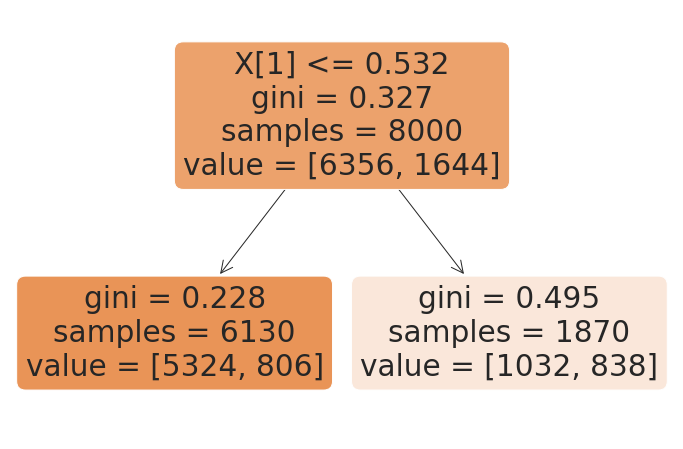

In [ ]:
dt_model=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
dt_model.fit(X_train,Y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model,rounded=True,filled=True)
plt.show()

In [ ]:
accuracy_score(Y_test,dt_model.predict(X_test))

In [ ]:
print(classification_report(Y_test, y_predicted))

2.Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,Y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print('Train Accuracy :', metrics.accuracy_score(Y_train,mlp.predict(X_train)))
print('Train Area Under Score:', metrics.roc_auc_score(Y_train, mlp.predict(X_train)))
print('Test Accuracy :', metrics.accuracy_score(Y_test, mlp.predict(X_test)))
print('Test Area Under Score :', metrics.roc_auc_score(Y_test, mlp.predict(X_test)))

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_nn ={
            'activation':['logistic','relu'],
            'solver': ['lbfgs','adam'],
            'hidden_layer_sizes': [30,50,80,100],
            'alpha':[0.3,0.4],
            'verbose':[2],
            'max_iter':[100,200]
          }

 

parameter_nn

In [ ]:
mlpc=GridSearchCV(mlp,param_grid=parameter_nn,cv=4, scoring='accuracy')

In [ ]:
mlpc.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.67619251
Iteration 2, loss = 0.56827402
Iteration 3, loss = 0.51710280
Iteration 4, loss = 0.49387061
Iteration 5, loss = 0.48231514
Iteration 6, loss = 0.47510738
Iteration 7, loss = 0.46986733
Iteration 8, loss = 0.46571814
Iteration 9, loss = 0.46215343
Iteration 10, loss = 0.45905873
Iteration 11, loss = 0.45638708
Iteration 12, loss = 0.45391608
Iteration 13, loss = 0.45175382
Iteration 14, loss = 0.44986968
Iteration 15, loss = 0.44820384
Iteration 16, loss = 0.44677754
Iteration 17, loss = 0.44550369
Iteration 18, loss = 0.44443501
Iteration 19, loss = 0.44344053
Iteration 20, loss = 0.44274088
Iteration 21, loss = 0.44200446
Iteration 22, loss = 0.44134571
Iteration 23, loss = 0.44091331
Iteration 24, loss = 0.44048364
Iteration 25, loss = 0.44016875
Iteration 26, loss = 0.43983053
Iteration 27, loss = 0.43961115
Iteration 28, loss = 0.43939369
Iteration 29, loss = 0.43919026
Iteration 30, loss = 0.43910263
Iteration 31, loss = 0.43875078
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.66122874
Iteration 2, loss = 0.55728135
Iteration 3, loss = 0.50745009
Iteration 4, loss = 0.48594113
Iteration 5, loss = 0.47528374
Iteration 6, loss = 0.46890309
Iteration 7, loss = 0.46440474
Iteration 8, loss = 0.46084983
Iteration 9, loss = 0.45788667
Iteration 10, loss = 0.45531519
Iteration 11, loss = 0.45308359
Iteration 12, loss = 0.45104911
Iteration 13, loss = 0.44928682
Iteration 14, loss = 0.44779698
Iteration 15, loss = 0.44644699
Iteration 16, loss = 0.44530656
Iteration 17, loss = 0.44423209
Iteration 18, loss = 0.44345246
Iteration 19, loss = 0.44264138
Iteration 20, loss = 0.44211708
Iteration 21, loss = 0.44153406
Iteration 22, loss = 0.44105097
Iteration 23, loss = 0.44058753
Iteration 24, loss = 0.44036344
Iteration 25, loss = 0.44006206
Iteration 26, loss = 0.43971424
Iteration 27, loss = 0.43956282
Iteration 28, loss = 0.43933458
Iteration 29, loss = 0.43926185
Iteration 30, loss = 0.43897071
Iteration 31, loss = 0.43883765
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.61459966
Iteration 2, loss = 0.53601178
Iteration 3, loss = 0.50259690
Iteration 4, loss = 0.48870203
Iteration 5, loss = 0.48109470
Iteration 6, loss = 0.47587422
Iteration 7, loss = 0.47172138
Iteration 8, loss = 0.46785698
Iteration 9, loss = 0.46460832
Iteration 10, loss = 0.46158815
Iteration 11, loss = 0.45879262
Iteration 12, loss = 0.45629097
Iteration 13, loss = 0.45398158
Iteration 14, loss = 0.45190258
Iteration 15, loss = 0.45007252
Iteration 16, loss = 0.44859844
Iteration 17, loss = 0.44694653
Iteration 18, loss = 0.44576169
Iteration 19, loss = 0.44465359
Iteration 20, loss = 0.44381659
Iteration 21, loss = 0.44312687
Iteration 22, loss = 0.44242843
Iteration 23, loss = 0.44196469
Iteration 24, loss = 0.44139750
Iteration 25, loss = 0.44117954
Iteration 26, loss = 0.44080555
Iteration 27, loss = 0.44055436
Iteration 28, loss = 0.44028636
Iteration 29, loss = 0.44018938
Iteration 30, loss = 0.43996580
Iteration 31, loss = 0.43976021
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.47925333
Iteration 5, loss = 0.47318283
Iteration 6, loss = 0.46830772
Iteration 7, loss = 0.46414549
Iteration 8, loss = 0.46060495
Iteration 9, loss = 0.45750781
Iteration 10, loss = 0.45473349
Iteration 11, loss = 0.45244869
Iteration 12, loss = 0.45023392
Iteration 13, loss = 0.44843577
Iteration 14, loss = 0.44705055
Iteration 15, loss = 0.44568990
Iteration 16, loss = 0.44471439
Iteration 17, loss = 0.44383787
Iteration 18, loss = 0.44306276
Iteration 19, loss = 0.44254312
Iteration 20, loss = 0.44207395
Iteration 21, loss = 0.44183276
Iteration 22, loss = 0.44153514
Iteration 23, loss = 0.44121056
Iteration 24, loss = 0.44099786
Iteration 25, loss = 0.44078641
Iteration 26, loss = 0.44066565
Iteration 27, loss = 0.44042312
Iteration 28, loss = 0.44029146
Iteration 29, loss = 0.44012818
Iteration 30, loss = 0.44018518
Iteration 31, loss = 0.44000466
Iteration 32, loss = 0.43984080
Iteration 33, loss = 0.43989810
Iteration 34, loss = 0.43965172
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.74873326
Iteration 2, loss = 0.61163687
Iteration 3, loss = 0.53720250
Iteration 4, loss = 0.50047292
Iteration 5, loss = 0.48257569
Iteration 6, loss = 0.47287908
Iteration 7, loss = 0.46720388
Iteration 8, loss = 0.46318233
Iteration 9, loss = 0.45995962
Iteration 10, loss = 0.45737161
Iteration 11, loss = 0.45506356
Iteration 12, loss = 0.45312926
Iteration 13, loss = 0.45126423
Iteration 14, loss = 0.44968803
Iteration 15, loss = 0.44831770
Iteration 16, loss = 0.44700858
Iteration 17, loss = 0.44589938
Iteration 18, loss = 0.44500073
Iteration 19, loss = 0.44407110
Iteration 20, loss = 0.44340192
Iteration 21, loss = 0.44268395
Iteration 22, loss = 0.44231279
Iteration 23, loss = 0.44162456
Iteration 24, loss = 0.44125241
Iteration 25, loss = 0.44082684
Iteration 26, loss = 0.44056174
Iteration 27, loss = 0.44018848
Iteration 28, loss = 0.43991767
Iteration 29, loss = 0.43997368
Iteration 30, loss = 0.43949260
Iteration 31, loss = 0.43932700
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.48031904
Iteration 5, loss = 0.47451417
Iteration 6, loss = 0.46961770
Iteration 7, loss = 0.46532861
Iteration 8, loss = 0.46169606
Iteration 9, loss = 0.45815008
Iteration 10, loss = 0.45527669
Iteration 11, loss = 0.45252197
Iteration 12, loss = 0.45058298
Iteration 13, loss = 0.44829814
Iteration 14, loss = 0.44670646
Iteration 15, loss = 0.44534495
Iteration 16, loss = 0.44424528
Iteration 17, loss = 0.44355293
Iteration 18, loss = 0.44300660
Iteration 19, loss = 0.44230162
Iteration 20, loss = 0.44195385
Iteration 21, loss = 0.44153501
Iteration 22, loss = 0.44133102
Iteration 23, loss = 0.44109062
Iteration 24, loss = 0.44099540
Iteration 25, loss = 0.44096159
Iteration 26, loss = 0.44064927
Iteration 27, loss = 0.44059059
Iteration 28, loss = 0.44054540
Iteration 29, loss = 0.44053061
Iteration 30, loss = 0.44029282
Iteration 31, loss = 0.44014796
Iteration 32, loss = 0.44010648
Iteration 33, loss = 0.44007095
Iteration 34, loss = 0.43992336
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.61444529
Iteration 2, loss = 0.51508085
Iteration 3, loss = 0.49145629
Iteration 4, loss = 0.48178883
Iteration 5, loss = 0.47477318
Iteration 6, loss = 0.46906377
Iteration 7, loss = 0.46433610
Iteration 8, loss = 0.46029184
Iteration 9, loss = 0.45675888
Iteration 10, loss = 0.45385918
Iteration 11, loss = 0.45129792
Iteration 12, loss = 0.44914536
Iteration 13, loss = 0.44730113
Iteration 14, loss = 0.44569566
Iteration 15, loss = 0.44440744
Iteration 16, loss = 0.44336354
Iteration 17, loss = 0.44259109
Iteration 18, loss = 0.44187417
Iteration 19, loss = 0.44129675
Iteration 20, loss = 0.44089429
Iteration 21, loss = 0.44049500
Iteration 22, loss = 0.44009316
Iteration 23, loss = 0.44003767
Iteration 24, loss = 0.43969523
Iteration 25, loss = 0.43949741
Iteration 26, loss = 0.43927604
Iteration 27, loss = 0.43932486
Iteration 28, loss = 0.43912035
Iteration 29, loss = 0.43896110
Iteration 30, loss = 0.43867876
Iteration 31, loss = 0.43859102
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.52694233
Iteration 3, loss = 0.49285256
Iteration 4, loss = 0.48157446
Iteration 5, loss = 0.47453944
Iteration 6, loss = 0.46917448
Iteration 7, loss = 0.46463152
Iteration 8, loss = 0.46085511
Iteration 9, loss = 0.45763458
Iteration 10, loss = 0.45472601
Iteration 11, loss = 0.45229766
Iteration 12, loss = 0.45011704
Iteration 13, loss = 0.44819076
Iteration 14, loss = 0.44668406
Iteration 15, loss = 0.44527767
Iteration 16, loss = 0.44415019
Iteration 17, loss = 0.44329938
Iteration 18, loss = 0.44250790
Iteration 19, loss = 0.44207972
Iteration 20, loss = 0.44147859
Iteration 21, loss = 0.44092423
Iteration 22, loss = 0.44072113
Iteration 23, loss = 0.44034649
Iteration 24, loss = 0.44011437
Iteration 25, loss = 0.44006137
Iteration 26, loss = 0.43985936
Iteration 27, loss = 0.43953863
Iteration 28, loss = 0.43930678
Iteration 29, loss = 0.43907757
Iteration 30, loss = 0.43927691
Iteration 31, loss = 0.43884040
Iteration 32, loss = 0.43893189
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.69241972
Iteration 2, loss = 0.54134871
Iteration 3, loss = 0.49503491
Iteration 4, loss = 0.48075502
Iteration 5, loss = 0.47374075
Iteration 6, loss = 0.46865603
Iteration 7, loss = 0.46454418
Iteration 8, loss = 0.46122178
Iteration 9, loss = 0.45825007
Iteration 10, loss = 0.45561929
Iteration 11, loss = 0.45336449
Iteration 12, loss = 0.45145431
Iteration 13, loss = 0.44976197
Iteration 14, loss = 0.44819245
Iteration 15, loss = 0.44700737
Iteration 16, loss = 0.44600416
Iteration 17, loss = 0.44515864
Iteration 18, loss = 0.44436502
Iteration 19, loss = 0.44380967
Iteration 20, loss = 0.44330848
Iteration 21, loss = 0.44291899
Iteration 22, loss = 0.44247172
Iteration 23, loss = 0.44222352
Iteration 24, loss = 0.44181036
Iteration 25, loss = 0.44162952
Iteration 26, loss = 0.44145439
Iteration 27, loss = 0.44127695
Iteration 28, loss = 0.44096287
Iteration 29, loss = 0.44087581
Iteration 30, loss = 0.44062384
Iteration 31, loss = 0.44068491
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.50125758
Iteration 3, loss = 0.48715715
Iteration 4, loss = 0.47980312
Iteration 5, loss = 0.47382945
Iteration 6, loss = 0.46910056
Iteration 7, loss = 0.46466540
Iteration 8, loss = 0.46091106
Iteration 9, loss = 0.45776334
Iteration 10, loss = 0.45468543
Iteration 11, loss = 0.45209113
Iteration 12, loss = 0.44991685
Iteration 13, loss = 0.44817421
Iteration 14, loss = 0.44686542
Iteration 15, loss = 0.44566382
Iteration 16, loss = 0.44462179
Iteration 17, loss = 0.44393282
Iteration 18, loss = 0.44340019
Iteration 19, loss = 0.44295167
Iteration 20, loss = 0.44282174
Iteration 21, loss = 0.44232999
Iteration 22, loss = 0.44206142
Iteration 23, loss = 0.44184978
Iteration 24, loss = 0.44184479
Iteration 25, loss = 0.44153348
Iteration 26, loss = 0.44146362
Iteration 27, loss = 0.44127948
Iteration 28, loss = 0.44108631
Iteration 29, loss = 0.44099910
Iteration 30, loss = 0.44094458
Iteration 31, loss = 0.44078668
Iteration 32, loss = 0.44074444
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.66911517
Iteration 2, loss = 0.52940718
Iteration 3, loss = 0.49005961
Iteration 4, loss = 0.47775882
Iteration 5, loss = 0.47096388
Iteration 6, loss = 0.46592985
Iteration 7, loss = 0.46180211
Iteration 8, loss = 0.45817082
Iteration 9, loss = 0.45517531
Iteration 10, loss = 0.45256138
Iteration 11, loss = 0.45025526
Iteration 12, loss = 0.44823307
Iteration 13, loss = 0.44651722
Iteration 14, loss = 0.44511838
Iteration 15, loss = 0.44403236
Iteration 16, loss = 0.44294886
Iteration 17, loss = 0.44226700
Iteration 18, loss = 0.44166769
Iteration 19, loss = 0.44097057
Iteration 20, loss = 0.44055708
Iteration 21, loss = 0.44019091
Iteration 22, loss = 0.43999536
Iteration 23, loss = 0.43971160
Iteration 24, loss = 0.43947875
Iteration 25, loss = 0.43925110
Iteration 26, loss = 0.43931369
Iteration 27, loss = 0.43908277
Iteration 28, loss = 0.43881206
Iteration 29, loss = 0.43866777
Iteration 30, loss = 0.43880560
Iteration 31, loss = 0.43847830
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.53008144
Iteration 2, loss = 0.48429563
Iteration 3, loss = 0.47379277
Iteration 4, loss = 0.46617498
Iteration 5, loss = 0.46097042
Iteration 6, loss = 0.45597650
Iteration 7, loss = 0.45208665
Iteration 8, loss = 0.44901488
Iteration 9, loss = 0.44669842
Iteration 10, loss = 0.44462655
Iteration 11, loss = 0.44336143
Iteration 12, loss = 0.44235601
Iteration 13, loss = 0.44190176
Iteration 14, loss = 0.44085072
Iteration 15, loss = 0.44057115
Iteration 16, loss = 0.44017816
Iteration 17, loss = 0.44006586
Iteration 18, loss = 0.44035030
Iteration 19, loss = 0.43976106
Iteration 20, loss = 0.43962333
Iteration 21, loss = 0.43916774
Iteration 22, loss = 0.43913573
Iteration 23, loss = 0.43897119
Iteration 24, loss = 0.43883813
Iteration 25, loss = 0.43892960
Iteration 26, loss = 0.43853539
Iteration 27, loss = 0.43857877
Iteration 28, loss = 0.43879198
Iteration 29, loss = 0.43828188
Iteration 30, loss = 0.43839099
Iteration 31, loss = 0.43834254
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.63273850
Iteration 2, loss = 0.49727138
Iteration 3, loss = 0.47980153
Iteration 4, loss = 0.47193382
Iteration 5, loss = 0.46588346
Iteration 6, loss = 0.46111740
Iteration 7, loss = 0.45703215
Iteration 8, loss = 0.45355987
Iteration 9, loss = 0.45075539
Iteration 10, loss = 0.44830471
Iteration 11, loss = 0.44649518
Iteration 12, loss = 0.44476747
Iteration 13, loss = 0.44359808
Iteration 14, loss = 0.44258658
Iteration 15, loss = 0.44195515
Iteration 16, loss = 0.44157793
Iteration 17, loss = 0.44093869
Iteration 18, loss = 0.44057623
Iteration 19, loss = 0.44014212
Iteration 20, loss = 0.44002615
Iteration 21, loss = 0.43984166
Iteration 22, loss = 0.43961886
Iteration 23, loss = 0.43930150
Iteration 24, loss = 0.43926447
Iteration 25, loss = 0.43901465
Iteration 26, loss = 0.43881217
Iteration 27, loss = 0.43881681
Iteration 28, loss = 0.43864249
Iteration 29, loss = 0.43867930
Iteration 30, loss = 0.43853717
Iteration 31, loss = 0.43863907
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.56087392
Iteration 2, loss = 0.48797827
Iteration 3, loss = 0.47792978
Iteration 4, loss = 0.47009320
Iteration 5, loss = 0.46430954
Iteration 6, loss = 0.45947213
Iteration 7, loss = 0.45546262
Iteration 8, loss = 0.45216921
Iteration 9, loss = 0.44914195
Iteration 10, loss = 0.44746656
Iteration 11, loss = 0.44543658
Iteration 12, loss = 0.44443769
Iteration 13, loss = 0.44346909
Iteration 14, loss = 0.44264823
Iteration 15, loss = 0.44215891
Iteration 16, loss = 0.44165478
Iteration 17, loss = 0.44124830
Iteration 18, loss = 0.44115908
Iteration 19, loss = 0.44082408
Iteration 20, loss = 0.44060604
Iteration 21, loss = 0.44103695
Iteration 22, loss = 0.44023750
Iteration 23, loss = 0.44023893
Iteration 24, loss = 0.44011332
Iteration 25, loss = 0.44006300
Iteration 26, loss = 0.43964614
Iteration 27, loss = 0.43948288
Iteration 28, loss = 0.43951091
Iteration 29, loss = 0.43946335
Iteration 30, loss = 0.43997099
Iteration 31, loss = 0.43929656
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.48199506
Iteration 4, loss = 0.47419778
Iteration 5, loss = 0.46857497
Iteration 6, loss = 0.46410100
Iteration 7, loss = 0.46033441
Iteration 8, loss = 0.45717241
Iteration 9, loss = 0.45456415
Iteration 10, loss = 0.45232313
Iteration 11, loss = 0.45041048
Iteration 12, loss = 0.44896762
Iteration 13, loss = 0.44765478
Iteration 14, loss = 0.44664677
Iteration 15, loss = 0.44597609
Iteration 16, loss = 0.44539478
Iteration 17, loss = 0.44476499
Iteration 18, loss = 0.44426452
Iteration 19, loss = 0.44413294
Iteration 20, loss = 0.44389537
Iteration 21, loss = 0.44364013
Iteration 22, loss = 0.44344011
Iteration 23, loss = 0.44327774
Iteration 24, loss = 0.44290612
Iteration 25, loss = 0.44276718
Iteration 26, loss = 0.44254497
Iteration 27, loss = 0.44242699
Iteration 28, loss = 0.44231157
Iteration 29, loss = 0.44229288
Iteration 30, loss = 0.44206877
Iteration 31, loss = 0.44201030
Iteration 32, loss = 0.44186970
Iteration 33, loss = 0.44176449
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.52614890
Iteration 2, loss = 0.48972780
Iteration 3, loss = 0.47828413
Iteration 4, loss = 0.46948868
Iteration 5, loss = 0.46308943
Iteration 6, loss = 0.45765325
Iteration 7, loss = 0.45341296
Iteration 8, loss = 0.44965201
Iteration 9, loss = 0.44688414
Iteration 10, loss = 0.44465360
Iteration 11, loss = 0.44305413
Iteration 12, loss = 0.44222567
Iteration 13, loss = 0.44183364
Iteration 14, loss = 0.44056028
Iteration 15, loss = 0.44026967
Iteration 16, loss = 0.43993635
Iteration 17, loss = 0.43970891
Iteration 18, loss = 0.43927705
Iteration 19, loss = 0.43935450
Iteration 20, loss = 0.43915404
Iteration 21, loss = 0.43902075
Iteration 22, loss = 0.43899512
Iteration 23, loss = 0.43855541
Iteration 24, loss = 0.43853189
Iteration 25, loss = 0.43857531
Iteration 26, loss = 0.43838312
Iteration 27, loss = 0.43827602
Iteration 28, loss = 0.43845367
Iteration 29, loss = 0.43808145
Iteration 30, loss = 0.43839929
Iteration 31, loss = 0.43832688
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.49051446
Iteration 3, loss = 0.47868075
Iteration 4, loss = 0.47086350
Iteration 5, loss = 0.46475182
Iteration 6, loss = 0.45990975
Iteration 7, loss = 0.45584688
Iteration 8, loss = 0.45261256
Iteration 9, loss = 0.45015574
Iteration 10, loss = 0.44804003
Iteration 11, loss = 0.44660672
Iteration 12, loss = 0.44547148
Iteration 13, loss = 0.44485939
Iteration 14, loss = 0.44398389
Iteration 15, loss = 0.44347976
Iteration 16, loss = 0.44321701
Iteration 17, loss = 0.44259997
Iteration 18, loss = 0.44253512
Iteration 19, loss = 0.44253408
Iteration 20, loss = 0.44203900
Iteration 21, loss = 0.44201267
Iteration 22, loss = 0.44170395
Iteration 23, loss = 0.44166899
Iteration 24, loss = 0.44158467
Iteration 25, loss = 0.44153620
Iteration 26, loss = 0.44149319
Iteration 27, loss = 0.44118669
Iteration 28, loss = 0.44142743
Iteration 29, loss = 0.44111346
Iteration 30, loss = 0.44095740
Iteration 31, loss = 0.44117471
Iteration 32, loss = 0.44088079
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.59047712
Iteration 2, loss = 0.49032382
Iteration 3, loss = 0.47816612
Iteration 4, loss = 0.47033555
Iteration 5, loss = 0.46438038
Iteration 6, loss = 0.45972630
Iteration 7, loss = 0.45580550
Iteration 8, loss = 0.45229153
Iteration 9, loss = 0.44976851
Iteration 10, loss = 0.44763381
Iteration 11, loss = 0.44587899
Iteration 12, loss = 0.44468344
Iteration 13, loss = 0.44372577
Iteration 14, loss = 0.44290340
Iteration 15, loss = 0.44245528
Iteration 16, loss = 0.44189704
Iteration 17, loss = 0.44148257
Iteration 18, loss = 0.44117648
Iteration 19, loss = 0.44096654
Iteration 20, loss = 0.44078721
Iteration 21, loss = 0.44074042
Iteration 22, loss = 0.44046094
Iteration 23, loss = 0.44010389
Iteration 24, loss = 0.43986085
Iteration 25, loss = 0.43972331
Iteration 26, loss = 0.43965168
Iteration 27, loss = 0.43935499
Iteration 28, loss = 0.43941935
Iteration 29, loss = 0.43954632
Iteration 30, loss = 0.43904400
Iteration 31, loss = 0.43934615
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.47553254
Iteration 4, loss = 0.46687031
Iteration 5, loss = 0.46058416
Iteration 6, loss = 0.45539091
Iteration 7, loss = 0.45121249
Iteration 8, loss = 0.44813409
Iteration 9, loss = 0.44551653
Iteration 10, loss = 0.44370070
Iteration 11, loss = 0.44262793
Iteration 12, loss = 0.44160913
Iteration 13, loss = 0.44110859
Iteration 14, loss = 0.44064139
Iteration 15, loss = 0.44007541
Iteration 16, loss = 0.43990700
Iteration 17, loss = 0.43962100
Iteration 18, loss = 0.43926454
Iteration 19, loss = 0.43908609
Iteration 20, loss = 0.43898824
Iteration 21, loss = 0.43943473
Iteration 22, loss = 0.43880340
Iteration 23, loss = 0.43842876
Iteration 24, loss = 0.43841534
Iteration 25, loss = 0.43825081
Iteration 26, loss = 0.43828905
Iteration 27, loss = 0.43818398
Iteration 28, loss = 0.43806460
Iteration 29, loss = 0.43817553
Iteration 30, loss = 0.43758625
Iteration 31, loss = 0.43792729
Iteration 32, loss = 0.43765847
Iteration 33, loss = 0.43753371
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.52799775
Iteration 2, loss = 0.48786448
Iteration 3, loss = 0.47568087
Iteration 4, loss = 0.46732954
Iteration 5, loss = 0.46065774
Iteration 6, loss = 0.45554271
Iteration 7, loss = 0.45150634
Iteration 8, loss = 0.44835847
Iteration 9, loss = 0.44594011
Iteration 10, loss = 0.44411415
Iteration 11, loss = 0.44273024
Iteration 12, loss = 0.44172721
Iteration 13, loss = 0.44122236
Iteration 14, loss = 0.44078418
Iteration 15, loss = 0.44015014
Iteration 16, loss = 0.44061408
Iteration 17, loss = 0.44006389
Iteration 18, loss = 0.43959034
Iteration 19, loss = 0.43944612
Iteration 20, loss = 0.43934463
Iteration 21, loss = 0.43898232
Iteration 22, loss = 0.43906656
Iteration 23, loss = 0.43877069
Iteration 24, loss = 0.43877972
Iteration 25, loss = 0.43872521
Iteration 26, loss = 0.43844076
Iteration 27, loss = 0.43838546
Iteration 28, loss = 0.43817696
Iteration 29, loss = 0.43841977
Iteration 30, loss = 0.43819623
Iteration 31, loss = 0.43809031
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.57390000
Iteration 2, loss = 0.48841605
Iteration 3, loss = 0.47610591
Iteration 4, loss = 0.46792318
Iteration 5, loss = 0.46171646
Iteration 6, loss = 0.45746142
Iteration 7, loss = 0.45278197
Iteration 8, loss = 0.44950309
Iteration 9, loss = 0.44689509
Iteration 10, loss = 0.44507316
Iteration 11, loss = 0.44354970
Iteration 12, loss = 0.44252768
Iteration 13, loss = 0.44182777
Iteration 14, loss = 0.44103737
Iteration 15, loss = 0.44074029
Iteration 16, loss = 0.44067420
Iteration 17, loss = 0.44018259
Iteration 18, loss = 0.43991672
Iteration 19, loss = 0.43963628
Iteration 20, loss = 0.43950843
Iteration 21, loss = 0.43926311
Iteration 22, loss = 0.43899954
Iteration 23, loss = 0.43897147
Iteration 24, loss = 0.43882758
Iteration 25, loss = 0.43886394
Iteration 26, loss = 0.43845468
Iteration 27, loss = 0.43854707
Iteration 28, loss = 0.43911896
Iteration 29, loss = 0.43857110
Iteration 30, loss = 0.43815208
Iteration 31, loss = 0.43797002
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.47424937
Iteration 4, loss = 0.46548752
Iteration 5, loss = 0.45934503
Iteration 6, loss = 0.45386125
Iteration 7, loss = 0.44982548
Iteration 8, loss = 0.44685228
Iteration 9, loss = 0.44452669
Iteration 10, loss = 0.44298069
Iteration 11, loss = 0.44298292
Iteration 12, loss = 0.44186520
Iteration 13, loss = 0.44126939
Iteration 14, loss = 0.44054921
Iteration 15, loss = 0.44093712
Iteration 16, loss = 0.44042731
Iteration 17, loss = 0.44045229
Iteration 18, loss = 0.43983663
Iteration 19, loss = 0.43985399
Iteration 20, loss = 0.43964864
Iteration 21, loss = 0.43943773
Iteration 22, loss = 0.43938787
Iteration 23, loss = 0.43931053
Iteration 24, loss = 0.43961198
Iteration 25, loss = 0.43928929
Iteration 26, loss = 0.43927835
Iteration 27, loss = 0.43922809
Iteration 28, loss = 0.43897736
Iteration 29, loss = 0.43879940
Iteration 30, loss = 0.43878031
Iteration 31, loss = 0.43903258
Iteration 32, loss = 0.43847344
Iteration 33, loss = 0.43847011
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.65278246
Iteration 2, loss = 0.55196953
Iteration 3, loss = 0.50622650
Iteration 4, loss = 0.48609512
Iteration 5, loss = 0.47628789
Iteration 6, loss = 0.47044883
Iteration 7, loss = 0.46607955
Iteration 8, loss = 0.46261378
Iteration 9, loss = 0.45979623
Iteration 10, loss = 0.45733783
Iteration 11, loss = 0.45505535
Iteration 12, loss = 0.45314506
Iteration 13, loss = 0.45159553
Iteration 14, loss = 0.44997127
Iteration 15, loss = 0.44872039
Iteration 16, loss = 0.44756043
Iteration 17, loss = 0.44658303
Iteration 18, loss = 0.44578029
Iteration 19, loss = 0.44509917
Iteration 20, loss = 0.44444041
Iteration 21, loss = 0.44388704
Iteration 22, loss = 0.44341159
Iteration 23, loss = 0.44300977
Iteration 24, loss = 0.44273304
Iteration 25, loss = 0.44249678
Iteration 26, loss = 0.44203645
Iteration 27, loss = 0.44197602
Iteration 28, loss = 0.44160524
Iteration 29, loss = 0.44169066
Iteration 30, loss = 0.44128902
Iteration 31, loss = 0.44134778
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.46803376
Iteration 8, loss = 0.46436980
Iteration 9, loss = 0.46110739
Iteration 10, loss = 0.45833231
Iteration 11, loss = 0.45574715
Iteration 12, loss = 0.45361240
Iteration 13, loss = 0.45159602
Iteration 14, loss = 0.44992587
Iteration 15, loss = 0.44844223
Iteration 16, loss = 0.44708716
Iteration 17, loss = 0.44598832
Iteration 18, loss = 0.44498233
Iteration 19, loss = 0.44417541
Iteration 20, loss = 0.44344466
Iteration 21, loss = 0.44293586
Iteration 22, loss = 0.44242404
Iteration 23, loss = 0.44202465
Iteration 24, loss = 0.44166997
Iteration 25, loss = 0.44143859
Iteration 26, loss = 0.44111678
Iteration 27, loss = 0.44086731
Iteration 28, loss = 0.44077702
Iteration 29, loss = 0.44044122
Iteration 30, loss = 0.44033627
Iteration 31, loss = 0.44016663
Iteration 32, loss = 0.44008120
Iteration 33, loss = 0.44002737
Iteration 34, loss = 0.43985112
Iteration 35, loss = 0.43970723
Iteration 36, loss = 0.43955823
Iteration 37, loss = 0.43947167
Iteration 3

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.47575450
Iteration 6, loss = 0.47019579
Iteration 7, loss = 0.46555799
Iteration 8, loss = 0.46137459
Iteration 9, loss = 0.45796794
Iteration 10, loss = 0.45489143
Iteration 11, loss = 0.45228453
Iteration 12, loss = 0.45016177
Iteration 13, loss = 0.44842755
Iteration 14, loss = 0.44691559
Iteration 15, loss = 0.44571339
Iteration 16, loss = 0.44473613
Iteration 17, loss = 0.44400450
Iteration 18, loss = 0.44334233
Iteration 19, loss = 0.44288069
Iteration 20, loss = 0.44257567
Iteration 21, loss = 0.44222343
Iteration 22, loss = 0.44197957
Iteration 23, loss = 0.44185325
Iteration 24, loss = 0.44164078
Iteration 25, loss = 0.44131297
Iteration 26, loss = 0.44115891
Iteration 27, loss = 0.44114725
Iteration 28, loss = 0.44090829
Iteration 29, loss = 0.44092144
Iteration 30, loss = 0.44066423
Iteration 31, loss = 0.44060211
Iteration 32, loss = 0.44059959
Iteration 33, loss = 0.44045523
Iteration 34, loss = 0.44043025
Iteration 35, loss = 0.44020765
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.48648079
Iteration 4, loss = 0.47907503
Iteration 5, loss = 0.47352794
Iteration 6, loss = 0.46883104
Iteration 7, loss = 0.46478979
Iteration 8, loss = 0.46125404
Iteration 9, loss = 0.45814967
Iteration 10, loss = 0.45545726
Iteration 11, loss = 0.45321976
Iteration 12, loss = 0.45129550
Iteration 13, loss = 0.44959805
Iteration 14, loss = 0.44846535
Iteration 15, loss = 0.44722986
Iteration 16, loss = 0.44620547
Iteration 17, loss = 0.44549460
Iteration 18, loss = 0.44518163
Iteration 19, loss = 0.44449141
Iteration 20, loss = 0.44419441
Iteration 21, loss = 0.44401086
Iteration 22, loss = 0.44358700
Iteration 23, loss = 0.44338157
Iteration 24, loss = 0.44325827
Iteration 25, loss = 0.44314585
Iteration 26, loss = 0.44303642
Iteration 27, loss = 0.44292955
Iteration 28, loss = 0.44266632
Iteration 29, loss = 0.44256415
Iteration 30, loss = 0.44249461
Iteration 31, loss = 0.44248435
Iteration 32, loss = 0.44240477
Iteration 33, loss = 0.44224217
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.54797192
Iteration 2, loss = 0.50509701
Iteration 3, loss = 0.49020621
Iteration 4, loss = 0.48166807
Iteration 5, loss = 0.47518593
Iteration 6, loss = 0.46979886
Iteration 7, loss = 0.46518197
Iteration 8, loss = 0.46139185
Iteration 9, loss = 0.45797368
Iteration 10, loss = 0.45511282
Iteration 11, loss = 0.45243057
Iteration 12, loss = 0.45024969
Iteration 13, loss = 0.44842705
Iteration 14, loss = 0.44681205
Iteration 15, loss = 0.44568129
Iteration 16, loss = 0.44444165
Iteration 17, loss = 0.44352249
Iteration 18, loss = 0.44293165
Iteration 19, loss = 0.44234117
Iteration 20, loss = 0.44181881
Iteration 21, loss = 0.44146065
Iteration 22, loss = 0.44104708
Iteration 23, loss = 0.44088345
Iteration 24, loss = 0.44061729
Iteration 25, loss = 0.44046503
Iteration 26, loss = 0.44034321
Iteration 27, loss = 0.44020938
Iteration 28, loss = 0.43992281
Iteration 29, loss = 0.43986356
Iteration 30, loss = 0.43980763
Iteration 31, loss = 0.43966084
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 0.46089637
Iteration 10, loss = 0.45782940
Iteration 11, loss = 0.45507697
Iteration 12, loss = 0.45259811
Iteration 13, loss = 0.45049864
Iteration 14, loss = 0.44865902
Iteration 15, loss = 0.44718380
Iteration 16, loss = 0.44589094
Iteration 17, loss = 0.44467727
Iteration 18, loss = 0.44384275
Iteration 19, loss = 0.44305109
Iteration 20, loss = 0.44246544
Iteration 21, loss = 0.44195996
Iteration 22, loss = 0.44164391
Iteration 23, loss = 0.44126056
Iteration 24, loss = 0.44106017
Iteration 25, loss = 0.44085650
Iteration 26, loss = 0.44055069
Iteration 27, loss = 0.44036370
Iteration 28, loss = 0.44034151
Iteration 29, loss = 0.44000296
Iteration 30, loss = 0.43996124
Iteration 31, loss = 0.43973104
Iteration 32, loss = 0.43961587
Iteration 33, loss = 0.43951595
Iteration 34, loss = 0.43939963
Iteration 35, loss = 0.43934261
Iteration 36, loss = 0.43925493
Iteration 37, loss = 0.43912619
Iteration 38, loss = 0.43900819
Iteration 39, loss = 0.43903200
Iteration

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.49817457
Iteration 5, loss = 0.48393354
Iteration 6, loss = 0.47607308
Iteration 7, loss = 0.47077051
Iteration 8, loss = 0.46679667
Iteration 9, loss = 0.46344458
Iteration 10, loss = 0.46071951
Iteration 11, loss = 0.45816871
Iteration 12, loss = 0.45604050
Iteration 13, loss = 0.45406915
Iteration 14, loss = 0.45250325
Iteration 15, loss = 0.45087857
Iteration 16, loss = 0.44957343
Iteration 17, loss = 0.44838857
Iteration 18, loss = 0.44744061
Iteration 19, loss = 0.44658007
Iteration 20, loss = 0.44580137
Iteration 21, loss = 0.44515671
Iteration 22, loss = 0.44471424
Iteration 23, loss = 0.44414760
Iteration 24, loss = 0.44386507
Iteration 25, loss = 0.44339987
Iteration 26, loss = 0.44319168
Iteration 27, loss = 0.44278480
Iteration 28, loss = 0.44260054
Iteration 29, loss = 0.44238604
Iteration 30, loss = 0.44218745
Iteration 31, loss = 0.44198456
Iteration 32, loss = 0.44185358
Iteration 33, loss = 0.44174502
Iteration 34, loss = 0.44161427
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.49273801
Iteration 5, loss = 0.48280826
Iteration 6, loss = 0.47656214
Iteration 7, loss = 0.47215574
Iteration 8, loss = 0.46857525
Iteration 9, loss = 0.46546359
Iteration 10, loss = 0.46273710
Iteration 11, loss = 0.46029759
Iteration 12, loss = 0.45824129
Iteration 13, loss = 0.45638080
Iteration 14, loss = 0.45465307
Iteration 15, loss = 0.45308325
Iteration 16, loss = 0.45177623
Iteration 17, loss = 0.45064623
Iteration 18, loss = 0.44973773
Iteration 19, loss = 0.44874718
Iteration 20, loss = 0.44792659
Iteration 21, loss = 0.44735200
Iteration 22, loss = 0.44681765
Iteration 23, loss = 0.44618025
Iteration 24, loss = 0.44585649
Iteration 25, loss = 0.44548350
Iteration 26, loss = 0.44521594
Iteration 27, loss = 0.44481014
Iteration 28, loss = 0.44457025
Iteration 29, loss = 0.44440464
Iteration 30, loss = 0.44415945
Iteration 31, loss = 0.44399768
Iteration 32, loss = 0.44389547
Iteration 33, loss = 0.44372602
Iteration 34, loss = 0.44367869
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.63578453
Iteration 2, loss = 0.51799161
Iteration 3, loss = 0.48759249
Iteration 4, loss = 0.47784865
Iteration 5, loss = 0.47179940
Iteration 6, loss = 0.46697200
Iteration 7, loss = 0.46295804
Iteration 8, loss = 0.45965940
Iteration 9, loss = 0.45666640
Iteration 10, loss = 0.45423077
Iteration 11, loss = 0.45207973
Iteration 12, loss = 0.45033920
Iteration 13, loss = 0.44870954
Iteration 14, loss = 0.44743770
Iteration 15, loss = 0.44640605
Iteration 16, loss = 0.44545844
Iteration 17, loss = 0.44466492
Iteration 18, loss = 0.44416438
Iteration 19, loss = 0.44353632
Iteration 20, loss = 0.44324112
Iteration 21, loss = 0.44286749
Iteration 22, loss = 0.44255217
Iteration 23, loss = 0.44240436
Iteration 24, loss = 0.44201472
Iteration 25, loss = 0.44186474
Iteration 26, loss = 0.44173867
Iteration 27, loss = 0.44149480
Iteration 28, loss = 0.44138965
Iteration 29, loss = 0.44122780
Iteration 30, loss = 0.44102985
Iteration 31, loss = 0.44089331
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.47250974
Iteration 7, loss = 0.46828710
Iteration 8, loss = 0.46472264
Iteration 9, loss = 0.46165251
Iteration 10, loss = 0.45908787
Iteration 11, loss = 0.45662999
Iteration 12, loss = 0.45454462
Iteration 13, loss = 0.45276956
Iteration 14, loss = 0.45109888
Iteration 15, loss = 0.44967866
Iteration 16, loss = 0.44857771
Iteration 17, loss = 0.44753007
Iteration 18, loss = 0.44656988
Iteration 19, loss = 0.44594738
Iteration 20, loss = 0.44518386
Iteration 21, loss = 0.44464588
Iteration 22, loss = 0.44430768
Iteration 23, loss = 0.44382333
Iteration 24, loss = 0.44351615
Iteration 25, loss = 0.44329896
Iteration 26, loss = 0.44284900
Iteration 27, loss = 0.44264813
Iteration 28, loss = 0.44248444
Iteration 29, loss = 0.44218119
Iteration 30, loss = 0.44190105
Iteration 31, loss = 0.44184773
Iteration 32, loss = 0.44152293
Iteration 33, loss = 0.44137884
Iteration 34, loss = 0.44134112
Iteration 35, loss = 0.44108118
Iteration 36, loss = 0.44100310
Iteration 37

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.48046009
Iteration 5, loss = 0.47346276
Iteration 6, loss = 0.46830951
Iteration 7, loss = 0.46425207
Iteration 8, loss = 0.46060517
Iteration 9, loss = 0.45769281
Iteration 10, loss = 0.45526014
Iteration 11, loss = 0.45304422
Iteration 12, loss = 0.45128153
Iteration 13, loss = 0.44977888
Iteration 14, loss = 0.44851718
Iteration 15, loss = 0.44740755
Iteration 16, loss = 0.44647743
Iteration 17, loss = 0.44586054
Iteration 18, loss = 0.44517813
Iteration 19, loss = 0.44463275
Iteration 20, loss = 0.44423377
Iteration 21, loss = 0.44388896
Iteration 22, loss = 0.44355748
Iteration 23, loss = 0.44332537
Iteration 24, loss = 0.44314439
Iteration 25, loss = 0.44286330
Iteration 26, loss = 0.44259860
Iteration 27, loss = 0.44253805
Iteration 28, loss = 0.44223529
Iteration 29, loss = 0.44217888
Iteration 30, loss = 0.44201579
Iteration 31, loss = 0.44198926
Iteration 32, loss = 0.44188121
Iteration 33, loss = 0.44164413
Iteration 34, loss = 0.44176807
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.59554061
Iteration 2, loss = 0.50828586
Iteration 3, loss = 0.48887503
Iteration 4, loss = 0.48128065
Iteration 5, loss = 0.47581188
Iteration 6, loss = 0.47122738
Iteration 7, loss = 0.46728746
Iteration 8, loss = 0.46380784
Iteration 9, loss = 0.46069709
Iteration 10, loss = 0.45820827
Iteration 11, loss = 0.45578323
Iteration 12, loss = 0.45367859
Iteration 13, loss = 0.45196873
Iteration 14, loss = 0.45054823
Iteration 15, loss = 0.44930692
Iteration 16, loss = 0.44827930
Iteration 17, loss = 0.44755340
Iteration 18, loss = 0.44684047
Iteration 19, loss = 0.44623505
Iteration 20, loss = 0.44617530
Iteration 21, loss = 0.44550686
Iteration 22, loss = 0.44513779
Iteration 23, loss = 0.44489494
Iteration 24, loss = 0.44503772
Iteration 25, loss = 0.44451279
Iteration 26, loss = 0.44427774
Iteration 27, loss = 0.44406194
Iteration 28, loss = 0.44401589
Iteration 29, loss = 0.44414822
Iteration 30, loss = 0.44348771
Iteration 31, loss = 0.44346467
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.64191670
Iteration 2, loss = 0.52004708
Iteration 3, loss = 0.48817255
Iteration 4, loss = 0.47833745
Iteration 5, loss = 0.47227885
Iteration 6, loss = 0.46760965
Iteration 7, loss = 0.46363218
Iteration 8, loss = 0.46025275
Iteration 9, loss = 0.45735731
Iteration 10, loss = 0.45482503
Iteration 11, loss = 0.45266898
Iteration 12, loss = 0.45074000
Iteration 13, loss = 0.44909861
Iteration 14, loss = 0.44772247
Iteration 15, loss = 0.44666076
Iteration 16, loss = 0.44574348
Iteration 17, loss = 0.44491084
Iteration 18, loss = 0.44438831
Iteration 19, loss = 0.44370759
Iteration 20, loss = 0.44341216
Iteration 21, loss = 0.44297489
Iteration 22, loss = 0.44258477
Iteration 23, loss = 0.44237852
Iteration 24, loss = 0.44216785
Iteration 25, loss = 0.44197882
Iteration 26, loss = 0.44174865
Iteration 27, loss = 0.44177261
Iteration 28, loss = 0.44143502
Iteration 29, loss = 0.44119153
Iteration 30, loss = 0.44110112
Iteration 31, loss = 0.44119807
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.47151516
Iteration 6, loss = 0.46665576
Iteration 7, loss = 0.46268239
Iteration 8, loss = 0.45933873
Iteration 9, loss = 0.45633693
Iteration 10, loss = 0.45415331
Iteration 11, loss = 0.45190214
Iteration 12, loss = 0.45032362
Iteration 13, loss = 0.44898076
Iteration 14, loss = 0.44777789
Iteration 15, loss = 0.44698622
Iteration 16, loss = 0.44634399
Iteration 17, loss = 0.44577307
Iteration 18, loss = 0.44535193
Iteration 19, loss = 0.44488187
Iteration 20, loss = 0.44469379
Iteration 21, loss = 0.44480963
Iteration 22, loss = 0.44444500
Iteration 23, loss = 0.44399581
Iteration 24, loss = 0.44400185
Iteration 25, loss = 0.44386173
Iteration 26, loss = 0.44348206
Iteration 27, loss = 0.44353067
Iteration 28, loss = 0.44319815
Iteration 29, loss = 0.44317122
Iteration 30, loss = 0.44302146
Iteration 31, loss = 0.44299606
Iteration 32, loss = 0.44273414
Iteration 33, loss = 0.44259924
Iteration 34, loss = 0.44247085
Iteration 35, loss = 0.44246015
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.57313613
Iteration 2, loss = 0.49471176
Iteration 3, loss = 0.48156348
Iteration 4, loss = 0.47309776
Iteration 5, loss = 0.46682163
Iteration 6, loss = 0.46171682
Iteration 7, loss = 0.45775355
Iteration 8, loss = 0.45433769
Iteration 9, loss = 0.45162006
Iteration 10, loss = 0.44926046
Iteration 11, loss = 0.44759991
Iteration 12, loss = 0.44622588
Iteration 13, loss = 0.44526047
Iteration 14, loss = 0.44447094
Iteration 15, loss = 0.44382178
Iteration 16, loss = 0.44341099
Iteration 17, loss = 0.44299471
Iteration 18, loss = 0.44252396
Iteration 19, loss = 0.44232875
Iteration 20, loss = 0.44198390
Iteration 21, loss = 0.44189537
Iteration 22, loss = 0.44189693
Iteration 23, loss = 0.44129588
Iteration 24, loss = 0.44117527
Iteration 25, loss = 0.44130839
Iteration 26, loss = 0.44097929
Iteration 27, loss = 0.44083610
Iteration 28, loss = 0.44086224
Iteration 29, loss = 0.44100639
Iteration 30, loss = 0.44049240
Iteration 31, loss = 0.44057494
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.65561715
Iteration 2, loss = 0.50705369
Iteration 3, loss = 0.48515019
Iteration 4, loss = 0.47677046
Iteration 5, loss = 0.47032702
Iteration 6, loss = 0.46521180
Iteration 7, loss = 0.46110099
Iteration 8, loss = 0.45766256
Iteration 9, loss = 0.45470120
Iteration 10, loss = 0.45225866
Iteration 11, loss = 0.45015828
Iteration 12, loss = 0.44867135
Iteration 13, loss = 0.44738628
Iteration 14, loss = 0.44628483
Iteration 15, loss = 0.44548263
Iteration 16, loss = 0.44477660
Iteration 17, loss = 0.44426265
Iteration 18, loss = 0.44385808
Iteration 19, loss = 0.44329133
Iteration 20, loss = 0.44301289
Iteration 21, loss = 0.44262966
Iteration 22, loss = 0.44252281
Iteration 23, loss = 0.44215720
Iteration 24, loss = 0.44189391
Iteration 25, loss = 0.44195556
Iteration 26, loss = 0.44159116
Iteration 27, loss = 0.44184004
Iteration 28, loss = 0.44153764
Iteration 29, loss = 0.44106569
Iteration 30, loss = 0.44094647
Iteration 31, loss = 0.44084275
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.50522547
Iteration 3, loss = 0.48214080
Iteration 4, loss = 0.47397208
Iteration 5, loss = 0.46809609
Iteration 6, loss = 0.46361310
Iteration 7, loss = 0.45969662
Iteration 8, loss = 0.45666199
Iteration 9, loss = 0.45419346
Iteration 10, loss = 0.45186141
Iteration 11, loss = 0.45017827
Iteration 12, loss = 0.44878226
Iteration 13, loss = 0.44760423
Iteration 14, loss = 0.44671692
Iteration 15, loss = 0.44605309
Iteration 16, loss = 0.44542797
Iteration 17, loss = 0.44492359
Iteration 18, loss = 0.44459930
Iteration 19, loss = 0.44424845
Iteration 20, loss = 0.44393018
Iteration 21, loss = 0.44357617
Iteration 22, loss = 0.44344016
Iteration 23, loss = 0.44312671
Iteration 24, loss = 0.44319161
Iteration 25, loss = 0.44292681
Iteration 26, loss = 0.44289107
Iteration 27, loss = 0.44309005
Iteration 28, loss = 0.44238976
Iteration 29, loss = 0.44222728
Iteration 30, loss = 0.44202343
Iteration 31, loss = 0.44194220
Iteration 32, loss = 0.44210193
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.82583290
Iteration 2, loss = 0.54525025
Iteration 3, loss = 0.48859159
Iteration 4, loss = 0.47686167
Iteration 5, loss = 0.47040636
Iteration 6, loss = 0.46578722
Iteration 7, loss = 0.46209009
Iteration 8, loss = 0.45889880
Iteration 9, loss = 0.45628703
Iteration 10, loss = 0.45432333
Iteration 11, loss = 0.45238973
Iteration 12, loss = 0.45077310
Iteration 13, loss = 0.44957641
Iteration 14, loss = 0.44856755
Iteration 15, loss = 0.44758789
Iteration 16, loss = 0.44684676
Iteration 17, loss = 0.44628833
Iteration 18, loss = 0.44578066
Iteration 19, loss = 0.44519390
Iteration 20, loss = 0.44499616
Iteration 21, loss = 0.44469527
Iteration 22, loss = 0.44430685
Iteration 23, loss = 0.44387460
Iteration 24, loss = 0.44375569
Iteration 25, loss = 0.44351167
Iteration 26, loss = 0.44326032
Iteration 27, loss = 0.44326697
Iteration 28, loss = 0.44302172
Iteration 29, loss = 0.44260864
Iteration 30, loss = 0.44242775
Iteration 31, loss = 0.44239724
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.48171983
Iteration 4, loss = 0.47341060
Iteration 5, loss = 0.46718230
Iteration 6, loss = 0.46214513
Iteration 7, loss = 0.45822454
Iteration 8, loss = 0.45483801
Iteration 9, loss = 0.45221331
Iteration 10, loss = 0.44996312
Iteration 11, loss = 0.44833417
Iteration 12, loss = 0.44714256
Iteration 13, loss = 0.44594617
Iteration 14, loss = 0.44479594
Iteration 15, loss = 0.44423095
Iteration 16, loss = 0.44372168
Iteration 17, loss = 0.44323305
Iteration 18, loss = 0.44293787
Iteration 19, loss = 0.44249503
Iteration 20, loss = 0.44245325
Iteration 21, loss = 0.44197625
Iteration 22, loss = 0.44168564
Iteration 23, loss = 0.44162454
Iteration 24, loss = 0.44151927
Iteration 25, loss = 0.44140389
Iteration 26, loss = 0.44114704
Iteration 27, loss = 0.44110443
Iteration 28, loss = 0.44091034
Iteration 29, loss = 0.44049300
Iteration 30, loss = 0.44062703
Iteration 31, loss = 0.44033930
Iteration 32, loss = 0.44035004
Iteration 33, loss = 0.44021161
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52620854
Iteration 2, loss = 0.49325056
Iteration 3, loss = 0.48115618
Iteration 4, loss = 0.47245594
Iteration 5, loss = 0.46583587
Iteration 6, loss = 0.46037992
Iteration 7, loss = 0.45610846
Iteration 8, loss = 0.45235399
Iteration 9, loss = 0.44965694
Iteration 10, loss = 0.44766488
Iteration 11, loss = 0.44607393
Iteration 12, loss = 0.44515102
Iteration 13, loss = 0.44429652
Iteration 14, loss = 0.44392922
Iteration 15, loss = 0.44361342
Iteration 16, loss = 0.44325206
Iteration 17, loss = 0.44276760
Iteration 18, loss = 0.44254746
Iteration 19, loss = 0.44232415
Iteration 20, loss = 0.44215275
Iteration 21, loss = 0.44207910
Iteration 22, loss = 0.44197613
Iteration 23, loss = 0.44166951
Iteration 24, loss = 0.44147977
Iteration 25, loss = 0.44117015
Iteration 26, loss = 0.44138781
Iteration 27, loss = 0.44140033
Iteration 28, loss = 0.44082088
Iteration 29, loss = 0.44096283
Iteration 30, loss = 0.44116933
Iteration 31, loss = 0.44103594
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.51239901
Iteration 2, loss = 0.49099125
Iteration 3, loss = 0.47754521
Iteration 4, loss = 0.46789415
Iteration 5, loss = 0.46052015
Iteration 6, loss = 0.45521400
Iteration 7, loss = 0.45099065
Iteration 8, loss = 0.44842893
Iteration 9, loss = 0.44594619
Iteration 10, loss = 0.44436048
Iteration 11, loss = 0.44351414
Iteration 12, loss = 0.44267211
Iteration 13, loss = 0.44246126
Iteration 14, loss = 0.44192358
Iteration 15, loss = 0.44173612
Iteration 16, loss = 0.44170193
Iteration 17, loss = 0.44123078
Iteration 18, loss = 0.44114771
Iteration 19, loss = 0.44099925
Iteration 20, loss = 0.44060515
Iteration 21, loss = 0.44071828
Iteration 22, loss = 0.44105688
Iteration 23, loss = 0.44006711
Iteration 24, loss = 0.44038640
Iteration 25, loss = 0.44001585
Iteration 26, loss = 0.43983139
Iteration 27, loss = 0.44009742
Iteration 28, loss = 0.43992560
Iteration 29, loss = 0.43999999
Iteration 30, loss = 0.43983457
Iteration 31, loss = 0.43962077
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.54610260
Iteration 2, loss = 0.48930583
Iteration 3, loss = 0.47693173
Iteration 4, loss = 0.46895546
Iteration 5, loss = 0.46303857
Iteration 6, loss = 0.45830798
Iteration 7, loss = 0.45448826
Iteration 8, loss = 0.45154746
Iteration 9, loss = 0.44989480
Iteration 10, loss = 0.44721717
Iteration 11, loss = 0.44603157
Iteration 12, loss = 0.44540507
Iteration 13, loss = 0.44452803
Iteration 14, loss = 0.44359845
Iteration 15, loss = 0.44306860
Iteration 16, loss = 0.44281374
Iteration 17, loss = 0.44234308
Iteration 18, loss = 0.44215086
Iteration 19, loss = 0.44240710
Iteration 20, loss = 0.44179570
Iteration 21, loss = 0.44191281
Iteration 22, loss = 0.44182273
Iteration 23, loss = 0.44110971
Iteration 24, loss = 0.44141062
Iteration 25, loss = 0.44095277
Iteration 26, loss = 0.44084530
Iteration 27, loss = 0.44102055
Iteration 28, loss = 0.44044409
Iteration 29, loss = 0.44058691
Iteration 30, loss = 0.44043095
Iteration 31, loss = 0.44022449
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.62349151
Iteration 2, loss = 0.52734588
Iteration 3, loss = 0.48510347
Iteration 4, loss = 0.46562403
Iteration 5, loss = 0.45372828
Iteration 6, loss = 0.44514847
Iteration 7, loss = 0.43842314
Iteration 8, loss = 0.43290829
Iteration 9, loss = 0.42812809
Iteration 10, loss = 0.42376636
Iteration 11, loss = 0.41954716
Iteration 12, loss = 0.41550976
Iteration 13, loss = 0.41148348
Iteration 14, loss = 0.40751990
Iteration 15, loss = 0.40369839
Iteration 16, loss = 0.39979235
Iteration 17, loss = 0.39630600
Iteration 18, loss = 0.39274053
Iteration 19, loss = 0.38965106
Iteration 20, loss = 0.38642237
Iteration 21, loss = 0.38347981
Iteration 22, loss = 0.38106274
Iteration 23, loss = 0.37855019
Iteration 24, loss = 0.37638176
Iteration 25, loss = 0.37449578
Iteration 26, loss = 0.37249662
Iteration 27, loss = 0.37102714
Iteration 28, loss = 0.36985833
Iteration 29, loss = 0.36838528
Iteration 30, loss = 0.36721007
Iteration 31, loss = 0.36611585
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.49611571
Iteration 4, loss = 0.47559378
Iteration 5, loss = 0.46172088
Iteration 6, loss = 0.45181927
Iteration 7, loss = 0.44456865
Iteration 8, loss = 0.43870520
Iteration 9, loss = 0.43403487
Iteration 10, loss = 0.42985279
Iteration 11, loss = 0.42575756
Iteration 12, loss = 0.42174301
Iteration 13, loss = 0.41761774
Iteration 14, loss = 0.41365685
Iteration 15, loss = 0.40983235
Iteration 16, loss = 0.40580523
Iteration 17, loss = 0.40194893
Iteration 18, loss = 0.39814020
Iteration 19, loss = 0.39463091
Iteration 20, loss = 0.39094772
Iteration 21, loss = 0.38772660
Iteration 22, loss = 0.38467751
Iteration 23, loss = 0.38178543
Iteration 24, loss = 0.37941937
Iteration 25, loss = 0.37729867
Iteration 26, loss = 0.37529323
Iteration 27, loss = 0.37356903
Iteration 28, loss = 0.37181025
Iteration 29, loss = 0.37025125
Iteration 30, loss = 0.36923240
Iteration 31, loss = 0.36794022
Iteration 32, loss = 0.36679353
Iteration 33, loss = 0.36585234
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.47875117
Iteration 5, loss = 0.46463092
Iteration 6, loss = 0.45412543
Iteration 7, loss = 0.44631320
Iteration 8, loss = 0.43984779
Iteration 9, loss = 0.43409478
Iteration 10, loss = 0.42892428
Iteration 11, loss = 0.42419535
Iteration 12, loss = 0.41936191
Iteration 13, loss = 0.41479227
Iteration 14, loss = 0.41029787
Iteration 15, loss = 0.40611783
Iteration 16, loss = 0.40207265
Iteration 17, loss = 0.39822188
Iteration 18, loss = 0.39444505
Iteration 19, loss = 0.39101691
Iteration 20, loss = 0.38738194
Iteration 21, loss = 0.38420390
Iteration 22, loss = 0.38157623
Iteration 23, loss = 0.37863664
Iteration 24, loss = 0.37621550
Iteration 25, loss = 0.37389356
Iteration 26, loss = 0.37207924
Iteration 27, loss = 0.37033087
Iteration 28, loss = 0.36841528
Iteration 29, loss = 0.36721679
Iteration 30, loss = 0.36559801
Iteration 31, loss = 0.36451987
Iteration 32, loss = 0.36389118
Iteration 33, loss = 0.36239861
Iteration 34, loss = 0.36165642
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 0.46421422
Iteration 7, loss = 0.45394017
Iteration 8, loss = 0.44597026
Iteration 9, loss = 0.43960103
Iteration 10, loss = 0.43425999
Iteration 11, loss = 0.42966263
Iteration 12, loss = 0.42514914
Iteration 13, loss = 0.42123502
Iteration 14, loss = 0.41742792
Iteration 15, loss = 0.41363134
Iteration 16, loss = 0.41005870
Iteration 17, loss = 0.40641211
Iteration 18, loss = 0.40314726
Iteration 19, loss = 0.39990946
Iteration 20, loss = 0.39697657
Iteration 21, loss = 0.39405724
Iteration 22, loss = 0.39131794
Iteration 23, loss = 0.38889449
Iteration 24, loss = 0.38641272
Iteration 25, loss = 0.38447865
Iteration 26, loss = 0.38210951
Iteration 27, loss = 0.38055469
Iteration 28, loss = 0.37878450
Iteration 29, loss = 0.37737129
Iteration 30, loss = 0.37599369
Iteration 31, loss = 0.37450044
Iteration 32, loss = 0.37335946
Iteration 33, loss = 0.37214312
Iteration 34, loss = 0.37137330
Iteration 35, loss = 0.37016154
Iteration 36, loss = 0.36913709
Iteration 37

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 1.23890206
Iteration 2, loss = 0.91884137
Iteration 3, loss = 0.71607176
Iteration 4, loss = 0.59894972
Iteration 5, loss = 0.53432597
Iteration 6, loss = 0.49812595
Iteration 7, loss = 0.47768367
Iteration 8, loss = 0.46494093
Iteration 9, loss = 0.45638675
Iteration 10, loss = 0.45014072
Iteration 11, loss = 0.44506884
Iteration 12, loss = 0.44078017
Iteration 13, loss = 0.43697735
Iteration 14, loss = 0.43365089
Iteration 15, loss = 0.43028850
Iteration 16, loss = 0.42728845
Iteration 17, loss = 0.42423839
Iteration 18, loss = 0.42137716
Iteration 19, loss = 0.41856194
Iteration 20, loss = 0.41565881
Iteration 21, loss = 0.41294968
Iteration 22, loss = 0.41033438
Iteration 23, loss = 0.40760016
Iteration 24, loss = 0.40488799
Iteration 25, loss = 0.40249360
Iteration 26, loss = 0.39992975
Iteration 27, loss = 0.39760184
Iteration 28, loss = 0.39525772
Iteration 29, loss = 0.39315726
Iteration 30, loss = 0.39104775
Iteration 31, loss = 0.38903605
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.67237319
Iteration 2, loss = 0.56662220
Iteration 3, loss = 0.51155611
Iteration 4, loss = 0.48272611
Iteration 5, loss = 0.46581489
Iteration 6, loss = 0.45535754
Iteration 7, loss = 0.44828004
Iteration 8, loss = 0.44280950
Iteration 9, loss = 0.43840057
Iteration 10, loss = 0.43462619
Iteration 11, loss = 0.43106257
Iteration 12, loss = 0.42750697
Iteration 13, loss = 0.42424156
Iteration 14, loss = 0.42087785
Iteration 15, loss = 0.41723702
Iteration 16, loss = 0.41352406
Iteration 17, loss = 0.40974578
Iteration 18, loss = 0.40587886
Iteration 19, loss = 0.40175398
Iteration 20, loss = 0.39802581
Iteration 21, loss = 0.39407994
Iteration 22, loss = 0.39064564
Iteration 23, loss = 0.38753962
Iteration 24, loss = 0.38462053
Iteration 25, loss = 0.38198770
Iteration 26, loss = 0.37968752
Iteration 27, loss = 0.37721958
Iteration 28, loss = 0.37535831
Iteration 29, loss = 0.37357087
Iteration 30, loss = 0.37225459
Iteration 31, loss = 0.37076935
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.65463598
Iteration 2, loss = 0.53682924
Iteration 3, loss = 0.49026697
Iteration 4, loss = 0.46828846
Iteration 5, loss = 0.45476554
Iteration 6, loss = 0.44569302
Iteration 7, loss = 0.43873555
Iteration 8, loss = 0.43296093
Iteration 9, loss = 0.42806789
Iteration 10, loss = 0.42321996
Iteration 11, loss = 0.41854314
Iteration 12, loss = 0.41398808
Iteration 13, loss = 0.40945659
Iteration 14, loss = 0.40524006
Iteration 15, loss = 0.40127336
Iteration 16, loss = 0.39745100
Iteration 17, loss = 0.39344659
Iteration 18, loss = 0.38981579
Iteration 19, loss = 0.38602689
Iteration 20, loss = 0.38295107
Iteration 21, loss = 0.38007758
Iteration 22, loss = 0.37773179
Iteration 23, loss = 0.37542338
Iteration 24, loss = 0.37282505
Iteration 25, loss = 0.37092502
Iteration 26, loss = 0.36923493
Iteration 27, loss = 0.36774141
Iteration 28, loss = 0.36598589
Iteration 29, loss = 0.36468763
Iteration 30, loss = 0.36325524
Iteration 31, loss = 0.36210699
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.45550920
Iteration 6, loss = 0.44561962
Iteration 7, loss = 0.43840596
Iteration 8, loss = 0.43230683
Iteration 9, loss = 0.42710260
Iteration 10, loss = 0.42186321
Iteration 11, loss = 0.41687467
Iteration 12, loss = 0.41179348
Iteration 13, loss = 0.40682457
Iteration 14, loss = 0.40218194
Iteration 15, loss = 0.39760090
Iteration 16, loss = 0.39343733
Iteration 17, loss = 0.38973028
Iteration 18, loss = 0.38633395
Iteration 19, loss = 0.38323612
Iteration 20, loss = 0.38040291
Iteration 21, loss = 0.37807201
Iteration 22, loss = 0.37576144
Iteration 23, loss = 0.37412976
Iteration 24, loss = 0.37240193
Iteration 25, loss = 0.37078144
Iteration 26, loss = 0.36937377
Iteration 27, loss = 0.36830832
Iteration 28, loss = 0.36712206
Iteration 29, loss = 0.36606030
Iteration 30, loss = 0.36546686
Iteration 31, loss = 0.36426470
Iteration 32, loss = 0.36355117
Iteration 33, loss = 0.36283782
Iteration 34, loss = 0.36211117
Iteration 35, loss = 0.36135924
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.44544673
Iteration 6, loss = 0.43700322
Iteration 7, loss = 0.42984280
Iteration 8, loss = 0.42428018
Iteration 9, loss = 0.41871610
Iteration 10, loss = 0.41386192
Iteration 11, loss = 0.40854276
Iteration 12, loss = 0.40345721
Iteration 13, loss = 0.39835967
Iteration 14, loss = 0.39399216
Iteration 15, loss = 0.38996163
Iteration 16, loss = 0.38600269
Iteration 17, loss = 0.38279189
Iteration 18, loss = 0.37954971
Iteration 19, loss = 0.37684909
Iteration 20, loss = 0.37454689
Iteration 21, loss = 0.37239875
Iteration 22, loss = 0.37041285
Iteration 23, loss = 0.36874384
Iteration 24, loss = 0.36752447
Iteration 25, loss = 0.36605518
Iteration 26, loss = 0.36513262
Iteration 27, loss = 0.36434670
Iteration 28, loss = 0.36285728
Iteration 29, loss = 0.36222494
Iteration 30, loss = 0.36146552
Iteration 31, loss = 0.36087502
Iteration 32, loss = 0.35969003
Iteration 33, loss = 0.35906147
Iteration 34, loss = 0.35850292
Iteration 35, loss = 0.35786123
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.45980694
Iteration 6, loss = 0.45229426
Iteration 7, loss = 0.44655552
Iteration 8, loss = 0.44208977
Iteration 9, loss = 0.43824990
Iteration 10, loss = 0.43425382
Iteration 11, loss = 0.43042705
Iteration 12, loss = 0.42677383
Iteration 13, loss = 0.42320116
Iteration 14, loss = 0.41939341
Iteration 15, loss = 0.41531432
Iteration 16, loss = 0.41124600
Iteration 17, loss = 0.40741387
Iteration 18, loss = 0.40322199
Iteration 19, loss = 0.39921394
Iteration 20, loss = 0.39505167
Iteration 21, loss = 0.39099872
Iteration 22, loss = 0.38740272
Iteration 23, loss = 0.38417970
Iteration 24, loss = 0.38086118
Iteration 25, loss = 0.37829017
Iteration 26, loss = 0.37559806
Iteration 27, loss = 0.37298341
Iteration 28, loss = 0.37108151
Iteration 29, loss = 0.36890784
Iteration 30, loss = 0.36757430
Iteration 31, loss = 0.36581068
Iteration 32, loss = 0.36490262
Iteration 33, loss = 0.36360366
Iteration 34, loss = 0.36209299
Iteration 35, loss = 0.36112535
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.67447865
Iteration 2, loss = 0.53023679
Iteration 3, loss = 0.48091382
Iteration 4, loss = 0.46205356
Iteration 5, loss = 0.45162372
Iteration 6, loss = 0.44384091
Iteration 7, loss = 0.43780669
Iteration 8, loss = 0.43231412
Iteration 9, loss = 0.42726124
Iteration 10, loss = 0.42229657
Iteration 11, loss = 0.41728571
Iteration 12, loss = 0.41243236
Iteration 13, loss = 0.40801868
Iteration 14, loss = 0.40344120
Iteration 15, loss = 0.39918952
Iteration 16, loss = 0.39528661
Iteration 17, loss = 0.39135469
Iteration 18, loss = 0.38769883
Iteration 19, loss = 0.38445234
Iteration 20, loss = 0.38148406
Iteration 21, loss = 0.37880498
Iteration 22, loss = 0.37635312
Iteration 23, loss = 0.37428851
Iteration 24, loss = 0.37201873
Iteration 25, loss = 0.37038593
Iteration 26, loss = 0.36865270
Iteration 27, loss = 0.36724505
Iteration 28, loss = 0.36571829
Iteration 29, loss = 0.36444511
Iteration 30, loss = 0.36326085
Iteration 31, loss = 0.36218496
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.58196665
Iteration 2, loss = 0.48212701
Iteration 3, loss = 0.45730871
Iteration 4, loss = 0.44508465
Iteration 5, loss = 0.43687608
Iteration 6, loss = 0.42970574
Iteration 7, loss = 0.42261656
Iteration 8, loss = 0.41550634
Iteration 9, loss = 0.40870577
Iteration 10, loss = 0.40222043
Iteration 11, loss = 0.39587158
Iteration 12, loss = 0.39021417
Iteration 13, loss = 0.38594127
Iteration 14, loss = 0.38134915
Iteration 15, loss = 0.37772525
Iteration 16, loss = 0.37486523
Iteration 17, loss = 0.37206103
Iteration 18, loss = 0.36991161
Iteration 19, loss = 0.36779969
Iteration 20, loss = 0.36589916
Iteration 21, loss = 0.36460730
Iteration 22, loss = 0.36286638
Iteration 23, loss = 0.36183124
Iteration 24, loss = 0.36053068
Iteration 25, loss = 0.35956635
Iteration 26, loss = 0.35875891
Iteration 27, loss = 0.35771343
Iteration 28, loss = 0.35709625
Iteration 29, loss = 0.35645336
Iteration 30, loss = 0.35564315
Iteration 31, loss = 0.35519276
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.64376117
Iteration 2, loss = 0.51115714
Iteration 3, loss = 0.47226272
Iteration 4, loss = 0.45634045
Iteration 5, loss = 0.44708450
Iteration 6, loss = 0.44027504
Iteration 7, loss = 0.43349876
Iteration 8, loss = 0.42742154
Iteration 9, loss = 0.42111518
Iteration 10, loss = 0.41499891
Iteration 11, loss = 0.40858206
Iteration 12, loss = 0.40286445
Iteration 13, loss = 0.39708889
Iteration 14, loss = 0.39197761
Iteration 15, loss = 0.38754926
Iteration 16, loss = 0.38302276
Iteration 17, loss = 0.37942185
Iteration 18, loss = 0.37643378
Iteration 19, loss = 0.37382229
Iteration 20, loss = 0.37189302
Iteration 21, loss = 0.36964561
Iteration 22, loss = 0.36818392
Iteration 23, loss = 0.36660249
Iteration 24, loss = 0.36500314
Iteration 25, loss = 0.36380875
Iteration 26, loss = 0.36279111
Iteration 27, loss = 0.36226672
Iteration 28, loss = 0.36111121
Iteration 29, loss = 0.36011225
Iteration 30, loss = 0.35935855
Iteration 31, loss = 0.35862898
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.44878607
Iteration 6, loss = 0.44007010
Iteration 7, loss = 0.43277121
Iteration 8, loss = 0.42606635
Iteration 9, loss = 0.41984190
Iteration 10, loss = 0.41337546
Iteration 11, loss = 0.40743709
Iteration 12, loss = 0.40188404
Iteration 13, loss = 0.39656992
Iteration 14, loss = 0.39145394
Iteration 15, loss = 0.38729529
Iteration 16, loss = 0.38342292
Iteration 17, loss = 0.38005944
Iteration 18, loss = 0.37705583
Iteration 19, loss = 0.37460341
Iteration 20, loss = 0.37234791
Iteration 21, loss = 0.37064488
Iteration 22, loss = 0.36852206
Iteration 23, loss = 0.36728440
Iteration 24, loss = 0.36591435
Iteration 25, loss = 0.36457448
Iteration 26, loss = 0.36362763
Iteration 27, loss = 0.36248076
Iteration 28, loss = 0.36182396
Iteration 29, loss = 0.36085298
Iteration 30, loss = 0.35985350
Iteration 31, loss = 0.35961180
Iteration 32, loss = 0.35862318
Iteration 33, loss = 0.35801236
Iteration 34, loss = 0.35749388
Iteration 35, loss = 0.35714199
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.45197941
Iteration 4, loss = 0.44340041
Iteration 5, loss = 0.43666033
Iteration 6, loss = 0.43062190
Iteration 7, loss = 0.42387084
Iteration 8, loss = 0.41762487
Iteration 9, loss = 0.41096194
Iteration 10, loss = 0.40421156
Iteration 11, loss = 0.39737747
Iteration 12, loss = 0.39095635
Iteration 13, loss = 0.38597232
Iteration 14, loss = 0.38078252
Iteration 15, loss = 0.37621597
Iteration 16, loss = 0.37288818
Iteration 17, loss = 0.37010382
Iteration 18, loss = 0.36822316
Iteration 19, loss = 0.36576701
Iteration 20, loss = 0.36387636
Iteration 21, loss = 0.36235718
Iteration 22, loss = 0.36138130
Iteration 23, loss = 0.36019968
Iteration 24, loss = 0.35903286
Iteration 25, loss = 0.35793632
Iteration 26, loss = 0.35724265
Iteration 27, loss = 0.35671231
Iteration 28, loss = 0.35585438
Iteration 29, loss = 0.35561223
Iteration 30, loss = 0.35441081
Iteration 31, loss = 0.35420887
Iteration 32, loss = 0.35391659
Iteration 33, loss = 0.35332417
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.61110121
Iteration 2, loss = 0.49733609
Iteration 3, loss = 0.46809861
Iteration 4, loss = 0.45457106
Iteration 5, loss = 0.44526158
Iteration 6, loss = 0.43782273
Iteration 7, loss = 0.43143886
Iteration 8, loss = 0.42532336
Iteration 9, loss = 0.41901376
Iteration 10, loss = 0.41268226
Iteration 11, loss = 0.40638753
Iteration 12, loss = 0.40042792
Iteration 13, loss = 0.39528604
Iteration 14, loss = 0.39018609
Iteration 15, loss = 0.38592881
Iteration 16, loss = 0.38182281
Iteration 17, loss = 0.37852324
Iteration 18, loss = 0.37551364
Iteration 19, loss = 0.37341666
Iteration 20, loss = 0.37106599
Iteration 21, loss = 0.36929889
Iteration 22, loss = 0.36712503
Iteration 23, loss = 0.36584577
Iteration 24, loss = 0.36456634
Iteration 25, loss = 0.36323857
Iteration 26, loss = 0.36231041
Iteration 27, loss = 0.36154896
Iteration 28, loss = 0.36069647
Iteration 29, loss = 0.35940109
Iteration 30, loss = 0.35930843
Iteration 31, loss = 0.35837506
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.54680994
Iteration 2, loss = 0.47366061
Iteration 3, loss = 0.45123568
Iteration 4, loss = 0.43870461
Iteration 5, loss = 0.42976131
Iteration 6, loss = 0.42145906
Iteration 7, loss = 0.41307955
Iteration 8, loss = 0.40504141
Iteration 9, loss = 0.39757473
Iteration 10, loss = 0.39095907
Iteration 11, loss = 0.38509626
Iteration 12, loss = 0.38084202
Iteration 13, loss = 0.37608936
Iteration 14, loss = 0.37279349
Iteration 15, loss = 0.37006539
Iteration 16, loss = 0.36772866
Iteration 17, loss = 0.36537684
Iteration 18, loss = 0.36349558
Iteration 19, loss = 0.36242342
Iteration 20, loss = 0.36081051
Iteration 21, loss = 0.35965789
Iteration 22, loss = 0.35855079
Iteration 23, loss = 0.35795157
Iteration 24, loss = 0.35690299
Iteration 25, loss = 0.35578837
Iteration 26, loss = 0.35524039
Iteration 27, loss = 0.35457606
Iteration 28, loss = 0.35396975
Iteration 29, loss = 0.35357512
Iteration 30, loss = 0.35291933
Iteration 31, loss = 0.35231327
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.47447762
Iteration 3, loss = 0.45416142
Iteration 4, loss = 0.44397606
Iteration 5, loss = 0.43673571
Iteration 6, loss = 0.43040794
Iteration 7, loss = 0.42452066
Iteration 8, loss = 0.41807409
Iteration 9, loss = 0.41141025
Iteration 10, loss = 0.40516300
Iteration 11, loss = 0.39884980
Iteration 12, loss = 0.39329086
Iteration 13, loss = 0.38777730
Iteration 14, loss = 0.38334739
Iteration 15, loss = 0.37921430
Iteration 16, loss = 0.37605151
Iteration 17, loss = 0.37318110
Iteration 18, loss = 0.37089543
Iteration 19, loss = 0.36900505
Iteration 20, loss = 0.36761863
Iteration 21, loss = 0.36534889
Iteration 22, loss = 0.36460948
Iteration 23, loss = 0.36324066
Iteration 24, loss = 0.36230978
Iteration 25, loss = 0.36148005
Iteration 26, loss = 0.36080256
Iteration 27, loss = 0.35945185
Iteration 28, loss = 0.35941510
Iteration 29, loss = 0.35851271
Iteration 30, loss = 0.35813879
Iteration 31, loss = 0.35766137
Iteration 32, loss = 0.35742856
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.44112645
Iteration 6, loss = 0.43303005
Iteration 7, loss = 0.42572555
Iteration 8, loss = 0.41867378
Iteration 9, loss = 0.41174961
Iteration 10, loss = 0.40501574
Iteration 11, loss = 0.39918713
Iteration 12, loss = 0.39348744
Iteration 13, loss = 0.38771782
Iteration 14, loss = 0.38335428
Iteration 15, loss = 0.37952074
Iteration 16, loss = 0.37596803
Iteration 17, loss = 0.37365288
Iteration 18, loss = 0.37081451
Iteration 19, loss = 0.36857349
Iteration 20, loss = 0.36709395
Iteration 21, loss = 0.36550778
Iteration 22, loss = 0.36436828
Iteration 23, loss = 0.36310514
Iteration 24, loss = 0.36208619
Iteration 25, loss = 0.36091011
Iteration 26, loss = 0.36011977
Iteration 27, loss = 0.35930137
Iteration 28, loss = 0.35844599
Iteration 29, loss = 0.35787738
Iteration 30, loss = 0.35700944
Iteration 31, loss = 0.35654671
Iteration 32, loss = 0.35621479
Iteration 33, loss = 0.35545238
Iteration 34, loss = 0.35505915
Iteration 35, loss = 0.35440070
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 5, loss = 0.43925772
Iteration 6, loss = 0.43162396
Iteration 7, loss = 0.42380363
Iteration 8, loss = 0.41642406
Iteration 9, loss = 0.40814278
Iteration 10, loss = 0.40087619
Iteration 11, loss = 0.39379503
Iteration 12, loss = 0.38734478
Iteration 13, loss = 0.38192860
Iteration 14, loss = 0.37745970
Iteration 15, loss = 0.37367493
Iteration 16, loss = 0.37044330
Iteration 17, loss = 0.36771521
Iteration 18, loss = 0.36544412
Iteration 19, loss = 0.36346671
Iteration 20, loss = 0.36208007
Iteration 21, loss = 0.36122808
Iteration 22, loss = 0.35942494
Iteration 23, loss = 0.35831100
Iteration 24, loss = 0.35737795
Iteration 25, loss = 0.35635936
Iteration 26, loss = 0.35526625
Iteration 27, loss = 0.35451727
Iteration 28, loss = 0.35402650
Iteration 29, loss = 0.35325145
Iteration 30, loss = 0.35279669
Iteration 31, loss = 0.35192412
Iteration 32, loss = 0.35124855
Iteration 33, loss = 0.35104620
Iteration 34, loss = 0.35025951
Iteration 35, loss = 0.34960263
Iteration 36

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.60318466
Iteration 2, loss = 0.49502753
Iteration 3, loss = 0.46395911
Iteration 4, loss = 0.44701965
Iteration 5, loss = 0.43605942
Iteration 6, loss = 0.42788759
Iteration 7, loss = 0.42071421
Iteration 8, loss = 0.41369834
Iteration 9, loss = 0.40675796
Iteration 10, loss = 0.40036277
Iteration 11, loss = 0.39385771
Iteration 12, loss = 0.38869458
Iteration 13, loss = 0.38316388
Iteration 14, loss = 0.37879824
Iteration 15, loss = 0.37519611
Iteration 16, loss = 0.37199898
Iteration 17, loss = 0.36911390
Iteration 18, loss = 0.36703126
Iteration 19, loss = 0.36480631
Iteration 20, loss = 0.36327027
Iteration 21, loss = 0.36212701
Iteration 22, loss = 0.36055292
Iteration 23, loss = 0.35966508
Iteration 24, loss = 0.35859506
Iteration 25, loss = 0.35746667
Iteration 26, loss = 0.35668014
Iteration 27, loss = 0.35611947
Iteration 28, loss = 0.35536180
Iteration 29, loss = 0.35460747
Iteration 30, loss = 0.35393806
Iteration 31, loss = 0.35366696
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.59948681
Iteration 2, loss = 0.51876807
Iteration 3, loss = 0.48754410
Iteration 4, loss = 0.47225394
Iteration 5, loss = 0.46256864
Iteration 6, loss = 0.45588319
Iteration 7, loss = 0.45072915
Iteration 8, loss = 0.44611682
Iteration 9, loss = 0.44219571
Iteration 10, loss = 0.43842417
Iteration 11, loss = 0.43428993
Iteration 12, loss = 0.43025470
Iteration 13, loss = 0.42585548
Iteration 14, loss = 0.42162906
Iteration 15, loss = 0.41742931
Iteration 16, loss = 0.41304938
Iteration 17, loss = 0.40903900
Iteration 18, loss = 0.40484694
Iteration 19, loss = 0.40104385
Iteration 20, loss = 0.39725724
Iteration 21, loss = 0.39406223
Iteration 22, loss = 0.39088777
Iteration 23, loss = 0.38821879
Iteration 24, loss = 0.38570278
Iteration 25, loss = 0.38393847
Iteration 26, loss = 0.38157792
Iteration 27, loss = 0.37978558
Iteration 28, loss = 0.37799904
Iteration 29, loss = 0.37675064
Iteration 30, loss = 0.37515595
Iteration 31, loss = 0.37410692
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.74927604
Iteration 2, loss = 0.60671219
Iteration 3, loss = 0.53523589
Iteration 4, loss = 0.50076557
Iteration 5, loss = 0.48172059
Iteration 6, loss = 0.46994028
Iteration 7, loss = 0.46176593
Iteration 8, loss = 0.45507169
Iteration 9, loss = 0.44983161
Iteration 10, loss = 0.44519039
Iteration 11, loss = 0.44129624
Iteration 12, loss = 0.43749452
Iteration 13, loss = 0.43402056
Iteration 14, loss = 0.43076971
Iteration 15, loss = 0.42735994
Iteration 16, loss = 0.42414998
Iteration 17, loss = 0.42097905
Iteration 18, loss = 0.41755760
Iteration 19, loss = 0.41419801
Iteration 20, loss = 0.41076918
Iteration 21, loss = 0.40754669
Iteration 22, loss = 0.40434003
Iteration 23, loss = 0.40129442
Iteration 24, loss = 0.39821433
Iteration 25, loss = 0.39554859
Iteration 26, loss = 0.39293357
Iteration 27, loss = 0.39032729
Iteration 28, loss = 0.38818339
Iteration 29, loss = 0.38589700
Iteration 30, loss = 0.38413780
Iteration 31, loss = 0.38214589
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.56903010
Iteration 3, loss = 0.51415546
Iteration 4, loss = 0.48854146
Iteration 5, loss = 0.47357656
Iteration 6, loss = 0.46305662
Iteration 7, loss = 0.45489152
Iteration 8, loss = 0.44813050
Iteration 9, loss = 0.44179795
Iteration 10, loss = 0.43615478
Iteration 11, loss = 0.43058239
Iteration 12, loss = 0.42504392
Iteration 13, loss = 0.41965743
Iteration 14, loss = 0.41450864
Iteration 15, loss = 0.40932260
Iteration 16, loss = 0.40449680
Iteration 17, loss = 0.39976153
Iteration 18, loss = 0.39527397
Iteration 19, loss = 0.39151420
Iteration 20, loss = 0.38781996
Iteration 21, loss = 0.38464877
Iteration 22, loss = 0.38193990
Iteration 23, loss = 0.37926415
Iteration 24, loss = 0.37709805
Iteration 25, loss = 0.37530755
Iteration 26, loss = 0.37341775
Iteration 27, loss = 0.37196804
Iteration 28, loss = 0.37067733
Iteration 29, loss = 0.36951490
Iteration 30, loss = 0.36825288
Iteration 31, loss = 0.36764853
Iteration 32, loss = 0.36670346
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.47825531
Iteration 6, loss = 0.46697915
Iteration 7, loss = 0.45806396
Iteration 8, loss = 0.45059029
Iteration 9, loss = 0.44388602
Iteration 10, loss = 0.43774202
Iteration 11, loss = 0.43179676
Iteration 12, loss = 0.42650795
Iteration 13, loss = 0.42094640
Iteration 14, loss = 0.41564881
Iteration 15, loss = 0.41079081
Iteration 16, loss = 0.40614233
Iteration 17, loss = 0.40172644
Iteration 18, loss = 0.39766913
Iteration 19, loss = 0.39395060
Iteration 20, loss = 0.39041167
Iteration 21, loss = 0.38763122
Iteration 22, loss = 0.38467776
Iteration 23, loss = 0.38204179
Iteration 24, loss = 0.37981387
Iteration 25, loss = 0.37796150
Iteration 26, loss = 0.37590654
Iteration 27, loss = 0.37439798
Iteration 28, loss = 0.37279042
Iteration 29, loss = 0.37181686
Iteration 30, loss = 0.37047337
Iteration 31, loss = 0.36894504
Iteration 32, loss = 0.36792389
Iteration 33, loss = 0.36714310
Iteration 34, loss = 0.36624345
Iteration 35, loss = 0.36534149
Iteration 36,

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.78517003
Iteration 2, loss = 0.61865302
Iteration 3, loss = 0.53471518
Iteration 4, loss = 0.49482271
Iteration 5, loss = 0.47489321
Iteration 6, loss = 0.46346936
Iteration 7, loss = 0.45660654
Iteration 8, loss = 0.45152644
Iteration 9, loss = 0.44758029
Iteration 10, loss = 0.44397102
Iteration 11, loss = 0.44097738
Iteration 12, loss = 0.43780738
Iteration 13, loss = 0.43493908
Iteration 14, loss = 0.43191942
Iteration 15, loss = 0.42883375
Iteration 16, loss = 0.42596144
Iteration 17, loss = 0.42293094
Iteration 18, loss = 0.41958745
Iteration 19, loss = 0.41627610
Iteration 20, loss = 0.41295465
Iteration 21, loss = 0.40963304
Iteration 22, loss = 0.40650747
Iteration 23, loss = 0.40313441
Iteration 24, loss = 0.40016226
Iteration 25, loss = 0.39703248
Iteration 26, loss = 0.39406227
Iteration 27, loss = 0.39116820
Iteration 28, loss = 0.38864742
Iteration 29, loss = 0.38639019
Iteration 30, loss = 0.38377462
Iteration 31, loss = 0.38163777
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.67951437
Iteration 2, loss = 0.54003624
Iteration 3, loss = 0.49007130
Iteration 4, loss = 0.46869623
Iteration 5, loss = 0.45672041
Iteration 6, loss = 0.44865499
Iteration 7, loss = 0.44255239
Iteration 8, loss = 0.43752957
Iteration 9, loss = 0.43276811
Iteration 10, loss = 0.42803386
Iteration 11, loss = 0.42290889
Iteration 12, loss = 0.41823590
Iteration 13, loss = 0.41337721
Iteration 14, loss = 0.40863160
Iteration 15, loss = 0.40394828
Iteration 16, loss = 0.39984125
Iteration 17, loss = 0.39506247
Iteration 18, loss = 0.39142306
Iteration 19, loss = 0.38794179
Iteration 20, loss = 0.38484193
Iteration 21, loss = 0.38236469
Iteration 22, loss = 0.37982618
Iteration 23, loss = 0.37768104
Iteration 24, loss = 0.37595808
Iteration 25, loss = 0.37429571
Iteration 26, loss = 0.37296621
Iteration 27, loss = 0.37121520
Iteration 28, loss = 0.36995858
Iteration 29, loss = 0.36884961
Iteration 30, loss = 0.36792107
Iteration 31, loss = 0.36685719
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.45966770
Iteration 5, loss = 0.45137218
Iteration 6, loss = 0.44520055
Iteration 7, loss = 0.44022186
Iteration 8, loss = 0.43541909
Iteration 9, loss = 0.43065585
Iteration 10, loss = 0.42637751
Iteration 11, loss = 0.42194485
Iteration 12, loss = 0.41754989
Iteration 13, loss = 0.41297051
Iteration 14, loss = 0.40858923
Iteration 15, loss = 0.40436497
Iteration 16, loss = 0.40067095
Iteration 17, loss = 0.39685477
Iteration 18, loss = 0.39347589
Iteration 19, loss = 0.39033914
Iteration 20, loss = 0.38786747
Iteration 21, loss = 0.38503001
Iteration 22, loss = 0.38280378
Iteration 23, loss = 0.38050656
Iteration 24, loss = 0.37906400
Iteration 25, loss = 0.37714155
Iteration 26, loss = 0.37544433
Iteration 27, loss = 0.37402086
Iteration 28, loss = 0.37277304
Iteration 29, loss = 0.37120213
Iteration 30, loss = 0.37040470
Iteration 31, loss = 0.36905160
Iteration 32, loss = 0.36834646
Iteration 33, loss = 0.36742419
Iteration 34, loss = 0.36623387
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.63867208
Iteration 3, loss = 0.53445206
Iteration 4, loss = 0.48969402
Iteration 5, loss = 0.46919202
Iteration 6, loss = 0.45760447
Iteration 7, loss = 0.45006539
Iteration 8, loss = 0.44392181
Iteration 9, loss = 0.43876542
Iteration 10, loss = 0.43392293
Iteration 11, loss = 0.42904707
Iteration 12, loss = 0.42435392
Iteration 13, loss = 0.41966638
Iteration 14, loss = 0.41523530
Iteration 15, loss = 0.41092405
Iteration 16, loss = 0.40661507
Iteration 17, loss = 0.40298251
Iteration 18, loss = 0.39954872
Iteration 19, loss = 0.39574397
Iteration 20, loss = 0.39259471
Iteration 21, loss = 0.38955658
Iteration 22, loss = 0.38701661
Iteration 23, loss = 0.38470127
Iteration 24, loss = 0.38254240
Iteration 25, loss = 0.38047761
Iteration 26, loss = 0.37857985
Iteration 27, loss = 0.37702435
Iteration 28, loss = 0.37540198
Iteration 29, loss = 0.37409002
Iteration 30, loss = 0.37281067
Iteration 31, loss = 0.37153982
Iteration 32, loss = 0.37028071
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.47829683
Iteration 4, loss = 0.46232037
Iteration 5, loss = 0.45120797
Iteration 6, loss = 0.44193580
Iteration 7, loss = 0.43431173
Iteration 8, loss = 0.42644564
Iteration 9, loss = 0.41915791
Iteration 10, loss = 0.41220037
Iteration 11, loss = 0.40578352
Iteration 12, loss = 0.39991338
Iteration 13, loss = 0.39443249
Iteration 14, loss = 0.38989578
Iteration 15, loss = 0.38572760
Iteration 16, loss = 0.38222512
Iteration 17, loss = 0.37895551
Iteration 18, loss = 0.37642462
Iteration 19, loss = 0.37443315
Iteration 20, loss = 0.37243680
Iteration 21, loss = 0.37033390
Iteration 22, loss = 0.36895488
Iteration 23, loss = 0.36746916
Iteration 24, loss = 0.36616883
Iteration 25, loss = 0.36516942
Iteration 26, loss = 0.36427087
Iteration 27, loss = 0.36327245
Iteration 28, loss = 0.36240258
Iteration 29, loss = 0.36181357
Iteration 30, loss = 0.36096916
Iteration 31, loss = 0.36026610
Iteration 32, loss = 0.35964069
Iteration 33, loss = 0.35922037
Iteration 34, l

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.72435462
Iteration 2, loss = 0.55449362
Iteration 3, loss = 0.49337653
Iteration 4, loss = 0.46948391
Iteration 5, loss = 0.45857015
Iteration 6, loss = 0.45192703
Iteration 7, loss = 0.44686970
Iteration 8, loss = 0.44215247
Iteration 9, loss = 0.43785907
Iteration 10, loss = 0.43352016
Iteration 11, loss = 0.42911810
Iteration 12, loss = 0.42447021
Iteration 13, loss = 0.41986185
Iteration 14, loss = 0.41511917
Iteration 15, loss = 0.41044842
Iteration 16, loss = 0.40558239
Iteration 17, loss = 0.40134091
Iteration 18, loss = 0.39712897
Iteration 19, loss = 0.39334961
Iteration 20, loss = 0.38961528
Iteration 21, loss = 0.38616385
Iteration 22, loss = 0.38340498
Iteration 23, loss = 0.38068631
Iteration 24, loss = 0.37851534
Iteration 25, loss = 0.37600763
Iteration 26, loss = 0.37426552
Iteration 27, loss = 0.37255867
Iteration 28, loss = 0.37112280
Iteration 29, loss = 0.36974640
Iteration 30, loss = 0.36851323
Iteration 31, loss = 0.36754239
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.57976548
Iteration 2, loss = 0.48874410
Iteration 3, loss = 0.46640948
Iteration 4, loss = 0.45435512
Iteration 5, loss = 0.44548960
Iteration 6, loss = 0.43861329
Iteration 7, loss = 0.43178351
Iteration 8, loss = 0.42580295
Iteration 9, loss = 0.41975684
Iteration 10, loss = 0.41383709
Iteration 11, loss = 0.40852142
Iteration 12, loss = 0.40325328
Iteration 13, loss = 0.39848223
Iteration 14, loss = 0.39430444
Iteration 15, loss = 0.38994519
Iteration 16, loss = 0.38638824
Iteration 17, loss = 0.38348490
Iteration 18, loss = 0.38090973
Iteration 19, loss = 0.37808458
Iteration 20, loss = 0.37563545
Iteration 21, loss = 0.37376354
Iteration 22, loss = 0.37244909
Iteration 23, loss = 0.37094457
Iteration 24, loss = 0.36900118
Iteration 25, loss = 0.36807839
Iteration 26, loss = 0.36636030
Iteration 27, loss = 0.36556880
Iteration 28, loss = 0.36462193
Iteration 29, loss = 0.36334392
Iteration 30, loss = 0.36248244
Iteration 31, loss = 0.36219626
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.62587209
Iteration 2, loss = 0.49898673
Iteration 3, loss = 0.46490280
Iteration 4, loss = 0.44984516
Iteration 5, loss = 0.44000152
Iteration 6, loss = 0.43209603
Iteration 7, loss = 0.42546024
Iteration 8, loss = 0.41880454
Iteration 9, loss = 0.41248509
Iteration 10, loss = 0.40658210
Iteration 11, loss = 0.40121627
Iteration 12, loss = 0.39620789
Iteration 13, loss = 0.39139300
Iteration 14, loss = 0.38747871
Iteration 15, loss = 0.38404221
Iteration 16, loss = 0.38108811
Iteration 17, loss = 0.37840314
Iteration 18, loss = 0.37609027
Iteration 19, loss = 0.37433418
Iteration 20, loss = 0.37264017
Iteration 21, loss = 0.37091600
Iteration 22, loss = 0.36962566
Iteration 23, loss = 0.36833439
Iteration 24, loss = 0.36708121
Iteration 25, loss = 0.36609032
Iteration 26, loss = 0.36535908
Iteration 27, loss = 0.36510536
Iteration 28, loss = 0.36381838
Iteration 29, loss = 0.36342570
Iteration 30, loss = 0.36225309
Iteration 31, loss = 0.36244087
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 100, loss = 0.34986425
Iteration 1, loss = 0.64773370
Iteration 2, loss = 0.51357223
Iteration 3, loss = 0.47668460
Iteration 4, loss = 0.45963795
Iteration 5, loss = 0.44866274
Iteration 6, loss = 0.44019779
Iteration 7, loss = 0.43305067
Iteration 8, loss = 0.42624816
Iteration 9, loss = 0.41955898
Iteration 10, loss = 0.41276045
Iteration 11, loss = 0.40657044
Iteration 12, loss = 0.40084382
Iteration 13, loss = 0.39539340
Iteration 14, loss = 0.39063152
Iteration 15, loss = 0.38687832
Iteration 16, loss = 0.38283795
Iteration 17, loss = 0.37992327
Iteration 18, loss = 0.37704825
Iteration 19, loss = 0.37482844
Iteration 20, loss = 0.37290317
Iteration 21, loss = 0.37131966
Iteration 22, loss = 0.36964063
Iteration 23, loss = 0.36807090
Iteration 24, loss = 0.36724366
Iteration 25, loss = 0.36620950
Iteration 26, loss = 0.36496254
Iteration 27, loss = 0.36430181
Iteration 28, loss = 0.36342319
Iteration 29, loss = 0.36265381
Iteration 30, loss = 0.36194381
Iteration 31, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.45779214
Iteration 5, loss = 0.44713735
Iteration 6, loss = 0.43908732
Iteration 7, loss = 0.43116132
Iteration 8, loss = 0.42389119
Iteration 9, loss = 0.41649591
Iteration 10, loss = 0.40981593
Iteration 11, loss = 0.40297895
Iteration 12, loss = 0.39710592
Iteration 13, loss = 0.39191936
Iteration 14, loss = 0.38734428
Iteration 15, loss = 0.38304116
Iteration 16, loss = 0.37990916
Iteration 17, loss = 0.37672183
Iteration 18, loss = 0.37454244
Iteration 19, loss = 0.37198201
Iteration 20, loss = 0.36997761
Iteration 21, loss = 0.36832598
Iteration 22, loss = 0.36706667
Iteration 23, loss = 0.36588442
Iteration 24, loss = 0.36480015
Iteration 25, loss = 0.36353333
Iteration 26, loss = 0.36297563
Iteration 27, loss = 0.36193024
Iteration 28, loss = 0.36142945
Iteration 29, loss = 0.36030866
Iteration 30, loss = 0.35932623
Iteration 31, loss = 0.35904885
Iteration 32, loss = 0.35837271
Iteration 33, loss = 0.35795706
Iteration 34, loss = 0.35713163
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.54954939
Iteration 2, loss = 0.49001092
Iteration 3, loss = 0.46468142
Iteration 4, loss = 0.45038339
Iteration 5, loss = 0.44033405
Iteration 6, loss = 0.43231369
Iteration 7, loss = 0.42495364
Iteration 8, loss = 0.41780209
Iteration 9, loss = 0.41092983
Iteration 10, loss = 0.40435709
Iteration 11, loss = 0.39854574
Iteration 12, loss = 0.39282317
Iteration 13, loss = 0.38805495
Iteration 14, loss = 0.38403579
Iteration 15, loss = 0.38033887
Iteration 16, loss = 0.37673770
Iteration 17, loss = 0.37448668
Iteration 18, loss = 0.37197244
Iteration 19, loss = 0.37012593
Iteration 20, loss = 0.36831991
Iteration 21, loss = 0.36662965
Iteration 22, loss = 0.36499660
Iteration 23, loss = 0.36372206
Iteration 24, loss = 0.36268955
Iteration 25, loss = 0.36206661
Iteration 26, loss = 0.36132590
Iteration 27, loss = 0.36078982
Iteration 28, loss = 0.36003002
Iteration 29, loss = 0.35882100
Iteration 30, loss = 0.35828242
Iteration 31, loss = 0.35798945
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Iteration 1, loss = 0.51798735
Iteration 2, loss = 0.46986823
Iteration 3, loss = 0.45365544
Iteration 4, loss = 0.44321274
Iteration 5, loss = 0.43490780
Iteration 6, loss = 0.42741627
Iteration 7, loss = 0.41996407
Iteration 8, loss = 0.41245058
Iteration 9, loss = 0.40482250
Iteration 10, loss = 0.39817491
Iteration 11, loss = 0.39181214
Iteration 12, loss = 0.38658614
Iteration 13, loss = 0.38206300
Iteration 14, loss = 0.37840981
Iteration 15, loss = 0.37530816
Iteration 16, loss = 0.37306088
Iteration 17, loss = 0.37030514
Iteration 18, loss = 0.36902456
Iteration 19, loss = 0.36752734
Iteration 20, loss = 0.36573565
Iteration 21, loss = 0.36489962
Iteration 22, loss = 0.36330396
Iteration 23, loss = 0.36251481
Iteration 24, loss = 0.36145805
Iteration 25, loss = 0.36058278
Iteration 26, loss = 0.35954604
Iteration 27, loss = 0.35888043
Iteration 28, loss = 0.35912411
Iteration 29, loss = 0.35819138
Iteration 30, loss = 0.35765634
Iteration 31, loss = 0.35738383
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.44944539
Iteration 5, loss = 0.44117343
Iteration 6, loss = 0.43389506
Iteration 7, loss = 0.42671299
Iteration 8, loss = 0.41944561
Iteration 9, loss = 0.41225568
Iteration 10, loss = 0.40529454
Iteration 11, loss = 0.39819148
Iteration 12, loss = 0.39269728
Iteration 13, loss = 0.38765149
Iteration 14, loss = 0.38370099
Iteration 15, loss = 0.37940110
Iteration 16, loss = 0.37687708
Iteration 17, loss = 0.37430040
Iteration 18, loss = 0.37238516
Iteration 19, loss = 0.36985187
Iteration 20, loss = 0.36845410
Iteration 21, loss = 0.36719785
Iteration 22, loss = 0.36571856
Iteration 23, loss = 0.36495613
Iteration 24, loss = 0.36394126
Iteration 25, loss = 0.36321509
Iteration 26, loss = 0.36246063
Iteration 27, loss = 0.36157812
Iteration 28, loss = 0.36056762
Iteration 29, loss = 0.35981403
Iteration 30, loss = 0.35944995
Iteration 31, loss = 0.35907006
Iteration 32, loss = 0.35848043
Iteration 33, loss = 0.35869993
Iteration 34, loss = 0.35769280
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.49599790
Iteration 3, loss = 0.46871892
Iteration 4, loss = 0.45583166
Iteration 5, loss = 0.44730363
Iteration 6, loss = 0.44044983
Iteration 7, loss = 0.43410678
Iteration 8, loss = 0.42814171
Iteration 9, loss = 0.42196593
Iteration 10, loss = 0.41554920
Iteration 11, loss = 0.40915201
Iteration 12, loss = 0.40287748
Iteration 13, loss = 0.39739623
Iteration 14, loss = 0.39197714
Iteration 15, loss = 0.38762126
Iteration 16, loss = 0.38352482
Iteration 17, loss = 0.38050533
Iteration 18, loss = 0.37779817
Iteration 19, loss = 0.37525616
Iteration 20, loss = 0.37304447
Iteration 21, loss = 0.37127067
Iteration 22, loss = 0.36962071
Iteration 23, loss = 0.36839856
Iteration 24, loss = 0.36725634
Iteration 25, loss = 0.36615660
Iteration 26, loss = 0.36493217
Iteration 27, loss = 0.36401205
Iteration 28, loss = 0.36337238
Iteration 29, loss = 0.36284798
Iteration 30, loss = 0.36184109
Iteration 31, loss = 0.36136136
Iteration 32, loss = 0.36077149
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.46867242
Iteration 5, loss = 0.45561568
Iteration 6, loss = 0.44575362
Iteration 7, loss = 0.43765601
Iteration 8, loss = 0.42995497
Iteration 9, loss = 0.42271887
Iteration 10, loss = 0.41543876
Iteration 11, loss = 0.40850963
Iteration 12, loss = 0.40223623
Iteration 13, loss = 0.39626740
Iteration 14, loss = 0.39122495
Iteration 15, loss = 0.38648926
Iteration 16, loss = 0.38256094
Iteration 17, loss = 0.37907043
Iteration 18, loss = 0.37635489
Iteration 19, loss = 0.37423350
Iteration 20, loss = 0.37183496
Iteration 21, loss = 0.36988929
Iteration 22, loss = 0.36845894
Iteration 23, loss = 0.36743232
Iteration 24, loss = 0.36584389
Iteration 25, loss = 0.36479675
Iteration 26, loss = 0.36391465
Iteration 27, loss = 0.36255587
Iteration 28, loss = 0.36211988
Iteration 29, loss = 0.36110605
Iteration 30, loss = 0.36058544
Iteration 31, loss = 0.35993596
Iteration 32, loss = 0.35959962
Iteration 33, loss = 0.35876576
Iteration 34, loss = 0.35792732
Iteration 35, 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

Iteration 1, loss = 0.60611162
Iteration 2, loss = 0.49071712
Iteration 3, loss = 0.46423762
Iteration 4, loss = 0.45157238
Iteration 5, loss = 0.44250424
Iteration 6, loss = 0.43511158
Iteration 7, loss = 0.42836732
Iteration 8, loss = 0.42195111
Iteration 9, loss = 0.41590931
Iteration 10, loss = 0.40962347
Iteration 11, loss = 0.40357138
Iteration 12, loss = 0.39804302
Iteration 13, loss = 0.39306698
Iteration 14, loss = 0.38851044
Iteration 15, loss = 0.38431722
Iteration 16, loss = 0.38072345
Iteration 17, loss = 0.37790123
Iteration 18, loss = 0.37522675
Iteration 19, loss = 0.37351642
Iteration 20, loss = 0.37073034
Iteration 21, loss = 0.36908394
Iteration 22, loss = 0.36776323
Iteration 23, loss = 0.36602636
Iteration 24, loss = 0.36469282
Iteration 25, loss = 0.36370483
Iteration 26, loss = 0.36295882
Iteration 27, loss = 0.36215394
Iteration 28, loss = 0.36107039
Iteration 29, loss = 0.36035752
Iteration 30, loss = 0.35961958
Iteration 31, loss = 0.35965706
Iteration 32, los

GridSearchCV(cv=4, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.3, 0.4],
                         'hidden_layer_sizes': [30, 50, 80, 100],
                         'max_iter': [100, 200], 'solver': ['lbfgs', 'adam'],
                         'verbose': [2]},
             scoring='accuracy')

In [ ]:
predict_train1 = mlpc.predict(X_train)
predict_test01 = mlpc.predict(X_test)

**Accuracy**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_train,predict_train1))
print(classification_report(Y_train,predict_train1))

In [ ]:
print(confusion_matrix(Y_test,predict_test01))
print(classification_report(Y_test,predict_test01))

**3.Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,Y_train)
print('Train Accuracy :', metrics.accuracy_score(Y_train,model_rf.predict(X_train)))
print('Train Area Under Score:', metrics.roc_auc_score(Y_train, model_rf.predict(X_train)))
print('Test Accuracy :', metrics.accuracy_score(Y_test, model_rf.predict(X_test)))
print('Test Area Under Score :', metrics.roc_auc_score(Y_test, model_rf.predict(X_test)))

Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
             'criterion':['gini','entropy','log_loss'],
             'n_estimators':[400],
             'max_features':['sqrt', 'log2'],
              'max_depth':np.arange(5,20,2),
              'min_samples_split':np.arange(20,101,20)
             }

In [ ]:
model_rfc=GridSearchCV(model_rf,param_grid=param_grid, cv=4, n_jobs = 5, scoring='accuracy')

In [ ]:
model_rfc.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': array([ 20,  40,  60,  80, 100]),
                         'n_estimators': [400]},
             scoring='accuracy')

In [ ]:
y_pred3=model_rfc.predict(X_test)

In [ ]:
model_rfc.score(X_test,Y_test)

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, classification_report ,roc_auc_score

In [ ]:
model_score = model_rfc.score(X_test, Y_test)

In [ ]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred3))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model_rfc_predict = model_rfc.predict(X_test)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test,model_rfc_predict ))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test,model_rfc_predict ))

Pickling The Model file For Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(dt_model,open('model.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [ ]:
pickle.dump(model_rfc,open('model2.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('model2.pkl','rb'))

In [ ]:
pickle.dump(mlpc,open('model1.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('model1.pkl','rb'))